# Estudiante: Brahian Andrey Giraldo Alzate
# Asignatura: Minería de datos
# Fecha: 30 de junio del 2023

# Entender el objetivo y el dataset

El objetivo de esta actividad es implementar un proceso completo de limpieza de datos partiendo de base de la actividad 1.
Consiste en importar el conjunto de datos, preprocesarlos, hacer un análisis de la calidad de los datos, y mostrar una comparativa entre los datos iniciales y los datos finales, tras el conjunto de pasos que se han realizado.

Se realizó como trabajo previo la lectura del material docente de la parte específica que se encuentra disponible desde el comienzo del curso en la carpeta: Recursos y materiales>3.Material del profesor:

•	El proceso KDD (Knowledge Discovey in Databases).

•	Big Data: Preprocesamiento y calidad de datos .

•	GuiaResoluciónActividades.

Google Colab: Python y Machine Learning en la nube
En las videoconferencias teóricas (VC) se expondrá al alumno conocimientos, material e indicaciones suficientes para que pueda elaborar una unidad didáctica basada en el aprendizaje y enseñanza por competencias en matemáticas e informática.

En la videoconferencia de actividad guiada (AG) se establecerá las pautas concretas y la dinámica que el alumnado deberá seguir para realizar la actividad propuesta.

Las actividades se centrarán en poner en práctica y asentar los conocimientos adquiridos en la videoconferencia teórica anterior.


**El objetivo general del caso de estudio:** es determinar tendencias de inversión en el mercado según la base de datos disponible en mongodb, aplicando técnicas de procesamiento del lenguaje natural como el análisis de sentimiento que permitirán extraer información valiosa sobre los productos, servicios o empresas mencionados en los tweets.

**Objetivo 1:** Seleccionar empresa objetivo de inversión para un posterior estudio técnico de trading, usando un análisis de sentimiento en el texto de los tweets.

**Objetivo 2:** Aplicar modelo de pronósticos promedio móvil.

**Objetivo 3:** Validar de la tendencia mencionada en el tweet relacionado al a fecha correspondiente del texto.

**Algunos pasos utiles para la limpieza de datos**


Antes de usar algún algoritmo de aprendizaje automático o un modelo estadístico, siempre tenemos que limpiar los datos.
 Ningún modelo crea resultados significativos con datos "sucios".
La limpieza o depuración de datos es el proceso de detectar y corregir (o eliminar) registros corruptos o inexactos de un conjunto de registros, tabla o base de datos y se refiere a la identificación de partes incompletas, incorrectas, inexactas o irrelevantes de los datos y luego reemplazar, modificar o eliminar los datos sucios.

 Ciertamente esta parte no es muy divertida y requiere mucho tiempo.


Se usará una base de datos creada en mongoDB que contiene los tweets de 10 cuentas de influencia en el área del trading. Para obtener dicha base, se realizó un proceso de extracción de datos a partir de la API de twitter.


In [46]:
#from google.colab import drive
#drive.mount('/content/drive')

In [47]:
# import packages
import pandas as pd   # Estructuras de datos y herramientas para el análisis de datos.
import numpy as np    # Para trabajar con matrices y cálculos numéricos eficientes.
import seaborn as sns    # Funciones y herramientas para la visualización de datos estadísticos

import matplotlib.pyplot as plt    # Funciones para crear gráficos y visualizaciones.
import matplotlib.mlab as mlab    # Funciones adicionales para el procesamiento y análisis de datos.
import matplotlib
plt.style.use('ggplot')    # Establece el estilo de visualización de matplotlib en "ggplot", que es un estilo de visualización popular basado en el paquete ggplot2 de R
from matplotlib.pyplot import figure    # Para crear una nueva figura o lienzo para dibujar gráficos.

# Habilita la visualización de gráficos en línea en un entorno de Jupyter Notebook. Permite que los gráficos generados con matplotlib se muestren directamente debajo de la celda de código.

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)    # Configura el tamaño predeterminado de las figuras generadas por matplotlib. El tamaño se establece en 12 pulgadas de ancho y 8 pulgadas de alto.

pd.options.mode.chained_assignment = None   #Una asignación encadenada es una operación donde se realizan múltiples asignaciones consecutivas en una sola expresión. Esta configuración evita que se muestren advertencias relacionadas con este tipo de asignaciones.


# Informacion adicional

https://realpython.com/python-data-cleaning-numpy-pandas/



Leemos el fichero de fuente de datos, que previamente hemos importado al libro

In [48]:
# USANDO GOOGLE DRIVE LOCAL PARA CARGAR LAS BASES DE DATOS AL SCRIPT:

# df_apple = pd.read_csv('/content/drive/Othercomputers/Mi portátil/0 1 VIU/2 MODULO 2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/AAPL.csv', encoding="ascii")     Si no estás seguro de la codificación correcta, puedes intentar diferentes codificaciones comunes como 'utf-8', 'latin-1', 'iso-8859-1', 'cp1252', entre otras, hasta encontrar la que funcione correctamente para tu archivo CSV. Además, asegúrate de que el archivo CSV esté en el formato correcto y no esté dañado. Si el archivo CSV está corrupto o tiene problemas de formato, también podría causar este tipo de error.

# Aunque en las bases de datos originales se incluyen los valores del adj close y el volume, para el análisis sólamente se necesitan las columnas de Open, High, Low, y Close, para cada una de las empresas analizadas
# Ejemplo de base de datos original
print("AAPL")
df_AAPL = pd.read_csv('/content/drive/Othercomputers/Mi portátil/0 1 VIU/2 MODULO 2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/AAPL.csv')
print(df_AAPL.dtypes)
print(df_AAPL.columns)
print(df_AAPL.head(2))
print("")

print("CAVA")
df_CAVA = pd.read_csv('/content/drive/Othercomputers/Mi portátil/0 1 VIU/2 MODULO 2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/CAVA.csv')
print(df_CAVA.columns)
print(df_CAVA.head(2))
print("")


print("COIN")
df_COIN = pd.read_csv('/content/drive/Othercomputers/Mi portátil/0 1 VIU/2 MODULO 2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/COIN.csv')
print(df_COIN.columns)
print(df_COIN.head(2))
print("")


print("GEHC")
df_GEHC = pd.read_csv('/content/drive/Othercomputers/Mi portátil/0 1 VIU/2 MODULO 2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/GEHC.csv')
print(df_GEHC.columns)
print(df_GEHC.head(2))
print("")


print("GEHC")
df_GEHC = pd.read_csv('/content/drive/Othercomputers/Mi portátil/0 1 VIU/2 MODULO 2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/GEHC.csv')
print(df_GEHC.columns)
print(df_GEHC.head(2))
print("")

print("RUN")
df_RUN = pd.read_csv('/content/drive/Othercomputers/Mi portátil/0 1 VIU/2 MODULO 2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/RUN.csv')
print(df_RUN.columns)
print(df_RUN.head(2))
print("")

print("TMUS")
df_TMUS = pd.read_csv('/content/drive/Othercomputers/Mi portátil/0 1 VIU/2 MODULO 2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/TMUS.csv')
print(df_TMUS.columns)
print(df_TMUS.head(2))
print("")



AAPL


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Othercomputers/Mi portátil/0 1 VIU/2 MODULO 2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/AAPL.csv'

In [ ]:
# USANDO GIT HUB PARA CARGAR LAS BASES DE DATOS AL SCRIPT:

base_url = 'https://raw.githubusercontent.com/andru-brahian/trading_algoritmico/3e7970efb8e4891fc70b1e52f9b49566411d8385/MINERIA_DE_DATOS/'

print("AAPL")
df_AAPL = pd.read_csv(base_url + 'AAPL.csv')
print(df_AAPL.dtypes)
print(df_AAPL.columns)
print(df_AAPL.head(2))
print("")

print("CAVA")
df_CAVA = pd.read_csv(base_url + 'CAVA.csv')
print(df_CAVA.columns)
print(df_CAVA.head(2))
print("")

print("COIN")
df_COIN = pd.read_csv(base_url + 'COIN.csv')
print(df_COIN.columns)
print(df_COIN.head(2))
print("")

print("GEHC")
df_GEHC = pd.read_csv(base_url + 'GEHC.csv')
print(df_GEHC.columns)
print(df_GEHC.head(2))
print("")

print("RUN")
df_RUN = pd.read_csv(base_url + 'RUN.csv')
print(df_RUN.columns)
print(df_RUN.head(2))
print("")

print("TMUS")
df_TMUS = pd.read_csv(base_url + 'TMUS.csv')
print(df_TMUS.columns)
print(df_TMUS.head(2))
print("")

In [49]:
# uso de la API de yahoo finance
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# UNIÓN DE BASES DE DATOS DE YAHOO FINANCE MULTIPLES EMPRESAS ()
tickers = ["AAPL", "GEHC", "CAVA", "COIN", "TMUS","RUN"]
columns = ["High", "Low", "Open", "Close"]

df_caja = pd.DataFrame()

for column in columns:
    for ticker in tickers:
        data = yf.Ticker(ticker).history(start="2021-01-1", end="2023-06-29")
        df_caja[f"{ticker}_{column}"] = data[column]

# Especifica la ruta y el nombre de archivo para guardar el CSV
# USANDO GOOGLE DRIVE LOCAL PARA CARGAR LAS BASES DE DATOS AL SCRIPT: ruta_caja = "/content/drive/Othercomputers/Mi portátil/0 1 VIU/2 MODULO 2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/varias_empresas.csv"
ruta_caja = "https://github.com/andru-brahian/trading_algoritmico/tree/3e7970efb8e4891fc70b1e52f9b49566411d8385/MINERIA_DE_DATOS/varias_empresas.csv"

# Guarda el DataFrame como un archivo CSV
df_caja.to_csv(ruta_caja, index=False)

print(df_caja.columns)
print(df_caja.dtypes)

df_caja.head(100)

Index(['AAPL_High', 'GEHC_High', 'CAVA_High', 'COIN_High', 'TMUS_High',
       'RUN_High', 'AAPL_Low', 'GEHC_Low', 'CAVA_Low', 'COIN_Low', 'TMUS_Low',
       'RUN_Low', 'AAPL_Open', 'GEHC_Open', 'CAVA_Open', 'COIN_Open',
       'TMUS_Open', 'RUN_Open', 'AAPL_Close', 'GEHC_Close', 'CAVA_Close',
       'COIN_Close', 'TMUS_Close', 'RUN_Close'],
      dtype='object')
AAPL_High     float64
GEHC_High     float64
CAVA_High     float64
COIN_High     float64
TMUS_High     float64
RUN_High      float64
AAPL_Low      float64
GEHC_Low      float64
CAVA_Low      float64
COIN_Low      float64
TMUS_Low      float64
RUN_Low       float64
AAPL_Open     float64
GEHC_Open     float64
CAVA_Open     float64
COIN_Open     float64
TMUS_Open     float64
RUN_Open      float64
AAPL_Close    float64
GEHC_Close    float64
CAVA_Close    float64
COIN_Close    float64
TMUS_Close    float64
RUN_Close     float64
dtype: object


,AAPL_High,GEHC_High,CAVA_High,COIN_High,TMUS_High,RUN_High,AAPL_Low,GEHC_Low,CAVA_Low,COIN_Low,...,CAVA_Open,COIN_Open,TMUS_Open,RUN_Open,AAPL_Close,GEHC_Close,CAVA_Close,COIN_Close,TMUS_Close,RUN_Close
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,131.464217,NaN,NaN,NaN,134.979996,71.949997,124.724260,NaN,NaN,NaN,...,NaN,NaN,134.300003,70.680000,127.331711,NaN,NaN,NaN,132.429993,69.980003
2021-01-05 00:00:00-05:00,129.624262,NaN,NaN,NaN,132.240005,73.589996,126.367453,NaN,NaN,NaN,...,NaN,NaN,131.949997,69.730003,128.905960,NaN,NaN,NaN,131.850006,73.089996
2021-01-06 00:00:00-05:00,128.945348,NaN,NaN,NaN,131.979996,86.000000,124.350343,NaN,NaN,NaN,...,NaN,NaN,130.720001,77.669998,124.566818,NaN,NaN,NaN,131.529999,85.169998
2021-01-07 00:00:00-05:00,129.516033,NaN,NaN,NaN,135.449997,93.879997,125.806589,NaN,NaN,NaN,...,NaN,NaN,133.809998,89.220001,128.817429,NaN,NaN,NaN,133.190002,90.919998
2021-01-08 00:00:00-05:00,130.499978,NaN,NaN,NaN,135.199997,96.724998,128.138513,NaN,NaN,NaN,...,NaN,NaN,133.259995,92.720001,129.929321,NaN,NaN,NaN,135.059998,96.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20 00:00:00-04:00,126.070396,NaN,NaN,238.800003,136.679993,45.480000,123.484240,NaN,NaN,226.259995,...,NaN,236.100006,134.589996,43.450001,125.665695,NaN,NaN,233.399994,136.160004,44.689999
2021-05-21 00:00:00-04:00,126.346789,NaN,NaN,238.970001,137.429993,46.509998,123.592815,NaN,NaN,223.899994,...,NaN,235.970001,137.339996,45.009998,123.809975,NaN,NaN,224.350006,136.050003,45.970001
2021-05-24 00:00:00-04:00,126.287559,NaN,NaN,231.000000,138.410004,46.459999,124.313383,NaN,NaN,224.039993,...,NaN,227.279999,136.600006,46.252998,125.458397,NaN,NaN,225.300003,137.729996,44.849998


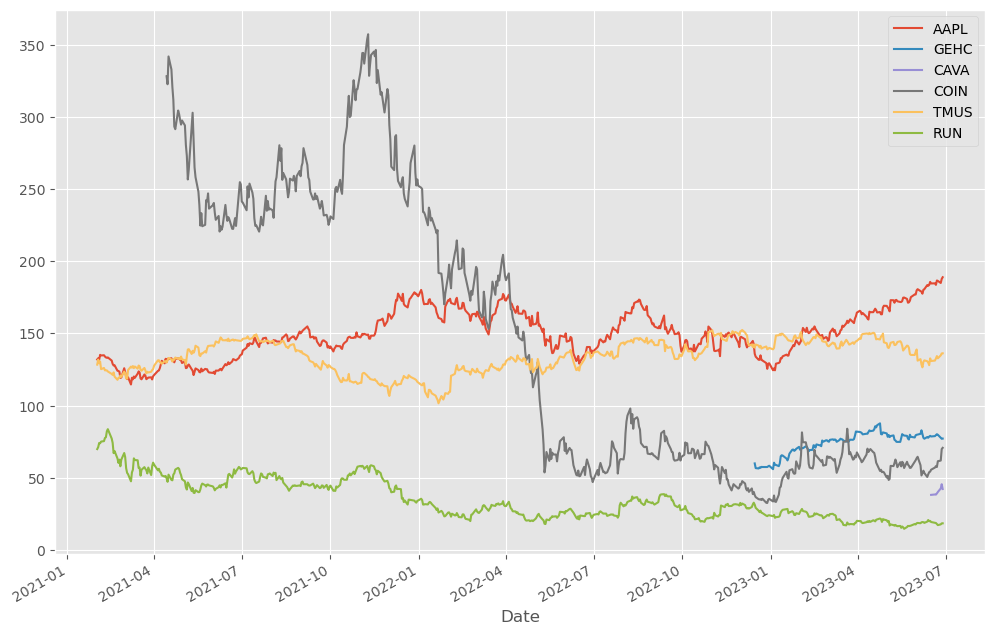

In [50]:
# Graficamos el Close (precio de cierre), para visualizar y comparar con las conclusiones de los tweets.
df_close = pd.DataFrame()

for ticker in tickers:
    df_close[ticker] = yf.Ticker(ticker).history(start="2021-01-31", end="2023-06-29").Close

df_close.plot()
plt.show()

A pesar de tener pocos registros para la empresa GEHC y la empresa CAVA, se puede obtener información valiosa para invertir en estas empresas, ya que las empresas que recien emergen suelen tener un crecimiento más notable, y esto es lo que genera ganancias a los traders. Si una empresa es muy grande, pero su crecimiento no es tan constante debido a su tamaño, tendrá menos posibilidaddes de generar ganancias a los traders.

In [51]:
# Lectura de los tweets
#desde jupyter notebook
df_tweets = pd.read_csv('C:/Users/USUARIO/Documents/1 univalle/0 1 VIU/2_MODULO_2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/ZIP_ENTREGABLE/tweetsfinancieros.csv')
#df_tweets = pd.read_csv('/content/drive/Othercomputers/Mi portátil/0 1 VIU/2 MODULO 2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/tweetsfinancieros.csv')https://github.com/andru-brahian/trading_algoritmico/tree/3e7970efb8e4891fc70b1e52f9b49566411d8385/MINERIA_DE_DATOS
df_tweets.head(2)


,_id,contributors,coordinates,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,extended_entities.media,...,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.translator_type,user.url,user.utc_offset,user.verified,user.withheld_in_countries
0,645a7dc7f55dd5c3370166e6,NaN,NaN,Tue May 09 16:46:57 +0000 2023,[],"[{""id"":1655977590501277700,""id_str"":""165597759...",[],[],[],"[{""id"":1655977590501277700,""id_str"":""165597759...",...,True,False,NorthmanTrader,5366,NaN,none,https://t.co/2rOR1Gp0G6,NaN,False,[]
1,645a7dc8f55dd5c3370166e7,NaN,NaN,Tue May 09 16:44:42 +0000 2023,[],NaN,[],"[{""url"":""https://t.co/Viw0kAzURr"",""expanded_ur...",[],NaN,...,True,False,NorthmanTrader,5366,NaN,none,https://t.co/2rOR1Gp0G6,NaN,False,[]


In [52]:
# si se modifica un archivo csv, puede generar corrupción de los datos, por ello, en la lectura del csv en esos casos se debe indicar el TIPO DE CODIFICACIÓN DEL CSV

import chardet

def detectar_codificacion(archivo):
    with open(archivo, 'rb') as f:
        resultado = chardet.detect(f.read())
    return resultado['encoding']

archivo_csv = '/content/drive/Othercomputers/Mi portátil/0 1 VIU/2 MODULO 2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/AAPL.csv'
codificacion = detectar_codificacion(archivo_csv)
print("La codificación del archivo es:", codificacion)

ModuleNotFoundError: No module named 'chardet'

In [53]:
import json

# Leyendo los datos con este medio, aparecen 29 columnas, y son 99. Por ello escojo leerlos datos en formato csv

def cargar_datos(ruta):
  #    para abrir el archivo especificado por la ruta y asignarle el nombre de variable tweets
  with open(ruta) as json_tweets:
    diccionario_tweets=json.load(json_tweets)    # Convierte los datos JSON en un objeto Python, como una lista o un diccionario, dependiendo de la estructura del archivo JSON., nos regresa un objet

  df_json_tweets=pd.DataFrame(diccionario_tweets)
  return df_json_tweets
    # for clave_valor in diccionario_tweets:      para imrpimir todo en caso de ser necesario (con .get se puede imprimir campos especificos)
    #  print(clave_valor)

if __name__=='__main__':
  ruta='/content/drive/Othercomputers/Mi portátil/0 1 VIU/2 MODULO 2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/tweetsfinancieros.json'
  #df_tweets = cargar_datos(ruta)


Comprobamos los tipos y la cantidad de instacias que tenemos

Inicialmente cada una de las 6 empresas tenía una base de datos de 600 filas, pero se unieron todas en una sola.

In [54]:

# URL base del repositorio en GitHub
base_url = 'https://raw.githubusercontent.com/andru-brahian/trading_algoritmico/3e7970efb8e4891fc70b1e52f9b49566411d8385/MINERIA_DE_DATOS/'
# usando google drive local: base_url = pd.read_csv('/content/drive/Othercomputers/Mi portátil/0 1 VIU/2 MODULO 2/5MBDI, MINERIA DE DATOS/ACTIVIDAD 2/')


# Cargar los dataframes
print("DATAFRAME DE AAPL")
df_AAPL = pd.read_csv(base_url + 'AAPL.csv')
print(df_AAPL.shape)
print("")
print(df_AAPL.dtypes)
print("")
print("")

print("DATAFRAME DE CAVA")
df_CAVA = pd.read_csv(base_url + 'CAVA.csv')
print(df_CAVA.shape)
print("")
print(df_CAVA.dtypes)
print("")
print("")

print("DATAFRAME DE COIN")
df_COIN = pd.read_csv(base_url + 'COIN.csv')
print(df_COIN.shape)
print("")
print(df_COIN.dtypes)
print("")
print("")

print("DATAFRAME DE GEHC")
df_GEHC = pd.read_csv(base_url + 'GEHC.csv')
print(df_GEHC.shape)
print("")
print(df_GEHC.dtypes)
print("")
print("")

print("DATAFRAME DE RUN")
df_RUN = pd.read_csv(base_url + 'RUN.csv')
print(df_RUN.shape)
print("")
print(df_RUN.dtypes)
print("")
print("")

print("DATAFRAME DE TMUS")
df_TMUS = pd.read_csv(base_url + 'TMUS.csv')
print(df_TMUS.shape)
print("")
print(df_TMUS.dtypes)
print("")
print("")

print("DATAFRAME DE 6 EMPRESAS")
# Aquí deberías cargar el dataframe "df_caja" también con la URL adecuada
print(df_caja.shape)
print("")
print(df_caja.dtypes)

DATAFRAME DE AAPL
(625, 7)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


DATAFRAME DE CAVA
(8, 7)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


DATAFRAME DE COIN
(556, 7)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


DATAFRAME DE GEHC
(134, 7)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


DATAFRAME DE RUN
(625, 7)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


DATAFRAME DE TMUS
(626, 7)

Date          object

Comprobamos de todas las variables, que subconjunto son númericas. (Potencialmente no tenemos que cambiar nada de ellas)

In [55]:
# SELECCIONANDO COLUMNAS O VARIABLES NUMÉRICAS
print("DATAFRAME DE TWEETS")
df_tweets_numeric = df_tweets.select_dtypes(include=[np.number])
numeric_tweets_columnas = df_tweets_numeric.columns.values
print(numeric_tweets_columnas)

print("")
print("DATAFRAME DE 6 EMPRESAS")
df_caja_numeric = df_caja.select_dtypes(include=[np.number])
numeric_caja_columnas = df_caja_numeric.columns.values
print(numeric_caja_columnas)

DATAFRAME DE TWEETS
['contributors' 'coordinates' 'favorite_count' 'geo' 'id' 'id_str'
 'in_reply_to_status_id' 'in_reply_to_status_id_str' 'in_reply_to_user_id'
 'in_reply_to_user_id_str' 'place' 'quoted_status.contributors'
 'quoted_status.coordinates' 'quoted_status.entities'
 'quoted_status.extended_entities' 'quoted_status.favorite_count'
 'quoted_status.geo' 'quoted_status.id' 'quoted_status.id_str'
 'quoted_status.in_reply_to_status_id'
 'quoted_status.in_reply_to_status_id_str'
 'quoted_status.in_reply_to_user_id'
 'quoted_status.in_reply_to_user_id_str' 'quoted_status.place'
 'quoted_status.retweet_count' 'quoted_status.user' 'quoted_status_id'
 'quoted_status_id_str' 'retweet_count' 'user.entities'
 'user.favourites_count' 'user.followers_count' 'user.friends_count'
 'user.id' 'user.id_str' 'user.lang' 'user.listed_count'
 'user.statuses_count' 'user.time_zone' 'user.utc_offset']

DATAFRAME DE 6 EMPRESAS
['AAPL_High' 'GEHC_High' 'CAVA_High' 'COIN_High' 'TMUS_High' 'RUN_High'


Hacemos lo mismo con las variables que no son númericas

In [56]:
# SELECCIONANDO COLUMNAS O VARIABLES NO NUMÉRICAS
# SELECCIONANDO COLUMNAS O VARIABLES NUMÉRICAS
print("DATAFRAME DE TWEETS")
df_tweets_no_numeric = df_tweets.select_dtypes(exclude=[np.number])
no_numeric_tweets_columnas = df_tweets_no_numeric.columns.values
print(no_numeric_tweets_columnas)

print("")
print("DATAFRAME DE 6 EMPRESAS")
df_caja_no_numeric = df_caja.select_dtypes(exclude=[np.number])
no_numeric_caja_columnas = df_caja_no_numeric.columns.values
print(no_numeric_caja_columnas)



DATAFRAME DE TWEETS
['_id' 'created_at' 'entities.hashtags' 'entities.media'
 'entities.symbols' 'entities.urls' 'entities.user_mentions'
 'extended_entities.media' 'favorited' 'in_reply_to_screen_name'
 'is_quote_status' 'lang' 'possibly_sensitive' 'quoted_status.created_at'
 'quoted_status.favorited' 'quoted_status.in_reply_to_screen_name'
 'quoted_status.is_quote_status' 'quoted_status.lang'
 'quoted_status.possibly_sensitive' 'quoted_status.retweeted'
 'quoted_status.source' 'quoted_status.text' 'quoted_status.truncated'
 'retweeted' 'source' 'text' 'truncated' 'user.contributors_enabled'
 'user.created_at' 'user.default_profile' 'user.default_profile_image'
 'user.description' 'user.follow_request_sent' 'user.following'
 'user.geo_enabled' 'user.has_extended_profile'
 'user.is_translation_enabled' 'user.is_translator' 'user.location'
 'user.name' 'user.notifications' 'user.profile_background_color'
 'user.profile_background_image_url'
 'user.profile_background_image_url_https' 'us

De estos resultados, aprendemos que entre todos los conjuntos de datos se tienen **10.574** filas. Entre las cuales, 2574 filas pertenecen a las bases de datos de las 6 empresas con 7 columnas cada empresa, y 8000 filas en la base de datos de twitter con **99** columnas cada fila.

La unificación de las bases de datos de las 6 empresas tiene como resultado 625 filas que incluye las columnas Open, High, Low y Close de cada empresa entre el año 2021 y el año 2023. Estas bases de datos se mezclaron usando cómo indice la fecha, y se generó como resultado una base de datos de 625 filas y 24 columnas.

También se identificó si las características son variables numéricas o categóricas. Todas ellas son información útil.
Ahora se revisará la lista de tipos de datos "sucios" y se arreglarán uno por uno.





# Missing values

Tratar con datos/valores perdidos.
Mientras que muchos modelos pueden vivir con otros problemas de los datos, la mayoría de los modelos no aceptan datos faltantes.

**¿Cómo averiguarlo?**


Cubrimos tres técnicas para aprender más sobre los datos que faltan en nuestro conjunto de datos.

## Missing Data Heatmap
Cuando hay un número menor de características, podemos visualizar los datos que faltan a través del mapa de calor.

<Axes: >

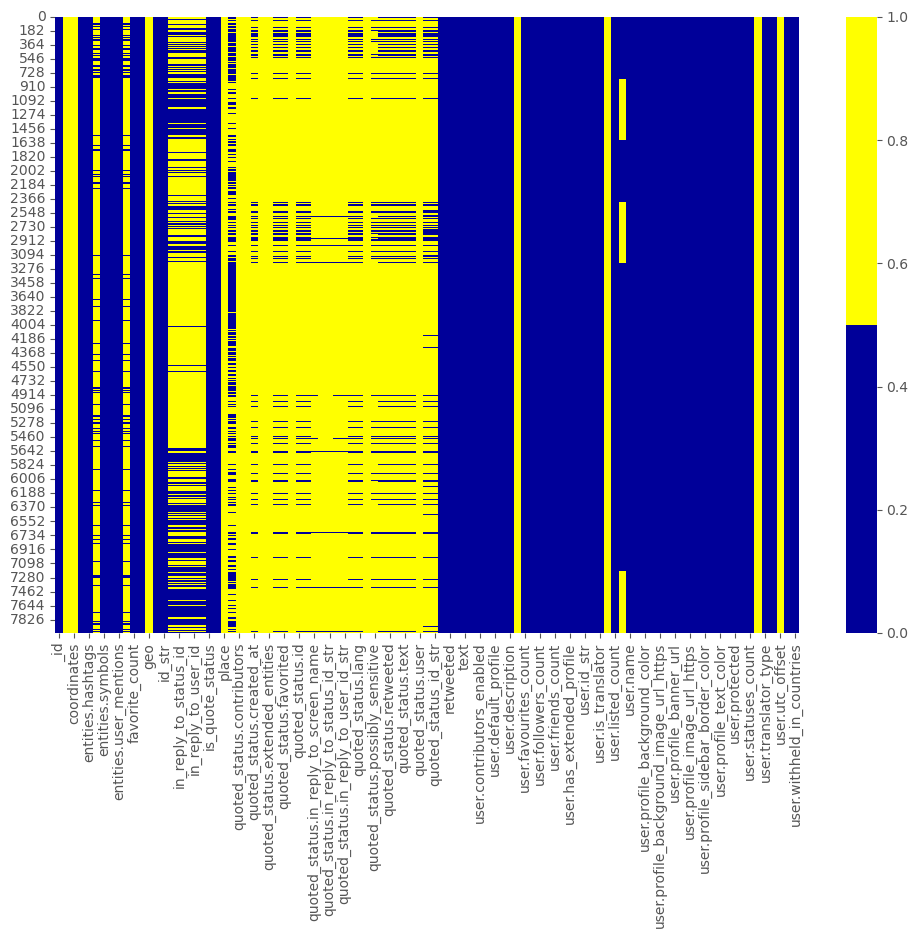

In [57]:
# para tener una visión general de todos los atributos los graficamos todos
cols = df_tweets.columns[:99] # first 99 columns
colours = ['#000099', '#ffff00'] # yellow is missing. blue is not missing.
sns.heatmap(df_tweets[cols].isnull(), cmap=sns.color_palette(colours))

<Axes: >

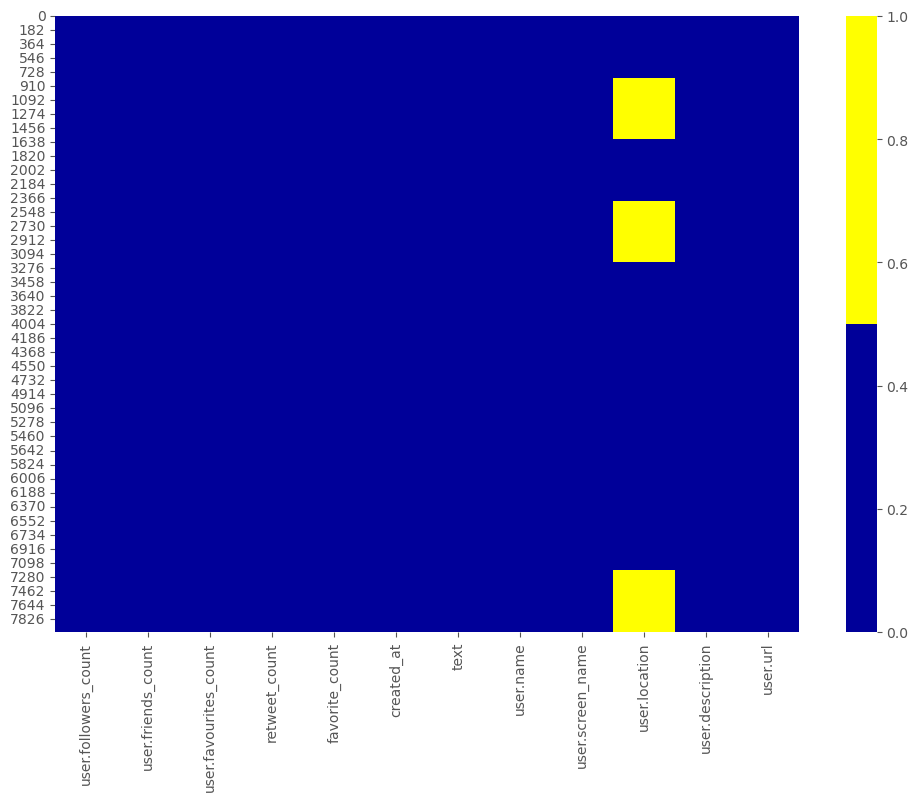

In [58]:
#Ahora se grafican los atributos que si se incluirán en el modelo de forma obligatoria, porque añaden valor al caso de estudio en general.

# Columnas que se desean graficar . Si no hay algo amarillo y azul al mismo tiempo en la gráfica, los colores no tienen sentido
columns_to_plot = ['user.followers_count','user.friends_count', 'user.favourites_count', 'retweet_count', 'favorite_count','created_at','text','user.name','user.screen_name','user.location','user.description','user.url']
colours = ['#000099', '#ffff00']  # Amarillo indica datos faltantes, azul indica datos presentes

# Crear el mapa de calor
sns.heatmap(df_tweets[columns_to_plot].isnull(), cmap=sns.color_palette(colours))

El gráfico que figura  muestra los patrones de datos que faltan de las 99 carácterísticas de la base de datos de los tweets.
El eje horizontal muestra el nombre del atributo de entrada; el eje vertical muestra el número de observaciones/filas; el color amarillo representa los datos que faltan, mientras que el color azul, en caso contrario.

Se puede observar que todos los atributos de quoted_status (un total de 14 columnas) no tienen datos alrededor de la mayoría de filas. Sin embargo no son columnas que nos aporten información útil, por lo cual las podemos eliminar.

Al observar el gráfico por completo, se concluye que se pueden eliminar más del 50% de atributos que no generan valor agregado al modelo. Por lo cual sólamente se conservarán los siguientes atributos de los cuales se incluyen ejemplos del tipo de dato:


    followers_count: 450887,
    friends_count: 72,
    favourites_count: 40595,
    retweet_count: 6,
    favorite_count: 49,

    created_at: 'Tue May 09 16:46:57 +0000 2023',
    text: '$34.4 trillion index price discovery. https://t.co/6PefA9mjWz',
    name: 'Sven Henrich',
    screen_name: 'NorthmanTrader',
    location: 'England, United Kingdom',
    description: 'Founder: NorthmanTrader. Financial Market Strategist. Macro & Technical Analysis. Keeping it real. Subscribe: https://t.co/rmRFFvMRaH…',
    url: 'https://t.co/2rOR1Gp0G6',
    created_at: 'Tue Jul 24 10:12:44 +0000 2012',

Los atributos o características que no se mencionaron en las lineas anteriores serán borrados

Los únicos datos faltantes en este caso, pertenecen al atributo de location, al cual le faltan muchos datos entre las filas 7.100 y 8.000. Los demás atributos incluídos en el modelo ya están completos.



## Missing Data Percentage List
Cuando hay muchas características en el conjunto de datos, podemos hacer una lista de los % de datos que faltan para cada característica.

Puede ser mucho más útil que el anterior cuando tienes muchas características y muchos valores

In [59]:
df_tweets.columns

Index(['_id', 'contributors', 'coordinates', 'created_at', 'entities.hashtags',
       'entities.media', 'entities.symbols', 'entities.urls',
       'entities.user_mentions', 'extended_entities.media', 'favorite_count',
       'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'quoted_status.contributors',
       'quoted_status.coordinates', 'quoted_status.created_at',
       'quoted_status.entities', 'quoted_status.extended_entities',
       'quoted_status.favorite_count', 'quoted_status.favorited',
       'quoted_status.geo', 'quoted_status.id', 'quoted_status.id_str',
       'quoted_status.in_reply_to_screen_name',
       'quoted_status.in_reply_to_status_id',
       'quoted_status.in_reply_to_status_id_str',
       'quoted_status.in_reply_to_user_id',
       'quoted_status.in_reply_to_user_

In [60]:
# Sólamente se evaluaran las columnas que agregan valor al modelo:
# df_tweets_resumido=df_tweets['_id','user.followers_count','user.friends_count', 'user.favourites_count', 'retweet_count', 'favorite_count','created_at','text','user.name','user.screen_name','user.location','user.description','user.url']
#df_tweets_resumido=df_tweets['_id','user.followers_count']
columnas_deseadas = ['_id', 'user.followers_count', 'user.friends_count', 'user.favourites_count', 'retweet_count', 'favorite_count', 'created_at', 'text', 'user.name', 'user.screen_name', 'user.location', 'user.description', 'user.url']
df_tweets_resumido = df_tweets[columnas_deseadas].copy()
print(df_tweets_resumido.dtypes)
df_tweets_resumido

_id                      object
user.followers_count      int64
user.friends_count        int64
user.favourites_count     int64
retweet_count             int64
favorite_count            int64
created_at               object
text                     object
user.name                object
user.screen_name         object
user.location            object
user.description         object
user.url                 object
dtype: object


,_id,user.followers_count,user.friends_count,user.favourites_count,retweet_count,favorite_count,created_at,text,user.name,user.screen_name,user.location,user.description,user.url
0,645a7dc7f55dd5c3370166e6,450887,72,40595,6,49,Tue May 09 16:46:57 +0000 2023,$34.4 trillion index price discovery. https://...,Sven Henrich,NorthmanTrader,"England, United Kingdom",Founder: NorthmanTrader. Financial Market Stra...,https://t.co/2rOR1Gp0G6
1,645a7dc8f55dd5c3370166e7,450887,72,40595,1,34,Tue May 09 16:44:42 +0000 2023,Yup.\n\nhttps://t.co/Viw0kAzURr,Sven Henrich,NorthmanTrader,"England, United Kingdom",Founder: NorthmanTrader. Financial Market Stra...,https://t.co/2rOR1Gp0G6
2,645a7dc8f55dd5c3370166e8,450887,72,40595,20,203,Tue May 09 16:27:53 +0000 2023,Same guy. Still predicting stuff &amp; still g...,Sven Henrich,NorthmanTrader,"England, United Kingdom",Founder: NorthmanTrader. Financial Market Stra...,https://t.co/2rOR1Gp0G6
3,645a7dc8f55dd5c3370166e9,450887,72,40595,40,205,Tue May 09 16:20:45 +0000 2023,The empire of debt has no choice but extend th...,Sven Henrich,NorthmanTrader,"England, United Kingdom",Founder: NorthmanTrader. Financial Market Stra...,https://t.co/2rOR1Gp0G6
4,645a7dc8f55dd5c3370166ea,450887,72,40595,7,125,Tue May 09 16:15:49 +0000 2023,Isn't that basically your job? Why give a spee...,Sven Henrich,NorthmanTrader,"England, United Kingdom",Founder: NorthmanTrader. Financial Market Stra...,https://t.co/2rOR1Gp0G6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,645a846ff55dd5c337018dca,388498,519,116874,0,2,Thu Dec 22 12:29:31 +0000 2022,@hereweago Not necessarily add size but rather...,Traderstewie,traderstewie,NaN,Making confident traders since 2009! Join the ...,https://t.co/7ytJXQNpAD
7996,645a8470f55dd5c337018dcb,388498,519,116874,0,0,Thu Dec 22 12:21:34 +0000 2022,@GelindoPastore Grazie,Traderstewie,traderstewie,NaN,Making confident traders since 2009! Join the ...,https://t.co/7ytJXQNpAD
7997,645a8470f55dd5c337018dcc,388498,519,116874,0,1,Thu Dec 22 07:05:53 +0000 2022,@CastleofFootba1 https://t.co/lMw7IPOZm7,Traderstewie,traderstewie,NaN,Making confident traders since 2009! Join the ...,https://t.co/7ytJXQNpAD
7998,645a8470f55dd5c337018dcd,388498,519,116874,156,742,Thu Dec 22 05:44:01 +0000 2022,I often find myself going back to re-read this...,Traderstewie,traderstewie,NaN,Making confident traders since 2009! Join the ...,https://t.co/7ytJXQNpAD


In [61]:
# SE CREA COLUMNA CON FECHA EN FORMATO UNIBLE CON LOS DEMÁS DF
df_tweets_resumido['new_date'] = pd.to_datetime(df_tweets_resumido['created_at'], format='%a %b %d %H:%M:%S %z %Y').dt.strftime('%Y-%m-%d')
print(df_tweets_resumido.dtypes)
df_tweets_resumido

_id                      object
user.followers_count      int64
user.friends_count        int64
user.favourites_count     int64
retweet_count             int64
favorite_count            int64
created_at               object
text                     object
user.name                object
user.screen_name         object
user.location            object
user.description         object
user.url                 object
new_date                 object
dtype: object


,_id,user.followers_count,user.friends_count,user.favourites_count,retweet_count,favorite_count,created_at,text,user.name,user.screen_name,user.location,user.description,user.url,new_date
0,645a7dc7f55dd5c3370166e6,450887,72,40595,6,49,Tue May 09 16:46:57 +0000 2023,$34.4 trillion index price discovery. https://...,Sven Henrich,NorthmanTrader,"England, United Kingdom",Founder: NorthmanTrader. Financial Market Stra...,https://t.co/2rOR1Gp0G6,2023-05-09
1,645a7dc8f55dd5c3370166e7,450887,72,40595,1,34,Tue May 09 16:44:42 +0000 2023,Yup.\n\nhttps://t.co/Viw0kAzURr,Sven Henrich,NorthmanTrader,"England, United Kingdom",Founder: NorthmanTrader. Financial Market Stra...,https://t.co/2rOR1Gp0G6,2023-05-09
2,645a7dc8f55dd5c3370166e8,450887,72,40595,20,203,Tue May 09 16:27:53 +0000 2023,Same guy. Still predicting stuff &amp; still g...,Sven Henrich,NorthmanTrader,"England, United Kingdom",Founder: NorthmanTrader. Financial Market Stra...,https://t.co/2rOR1Gp0G6,2023-05-09
3,645a7dc8f55dd5c3370166e9,450887,72,40595,40,205,Tue May 09 16:20:45 +0000 2023,The empire of debt has no choice but extend th...,Sven Henrich,NorthmanTrader,"England, United Kingdom",Founder: NorthmanTrader. Financial Market Stra...,https://t.co/2rOR1Gp0G6,2023-05-09
4,645a7dc8f55dd5c3370166ea,450887,72,40595,7,125,Tue May 09 16:15:49 +0000 2023,Isn't that basically your job? Why give a spee...,Sven Henrich,NorthmanTrader,"England, United Kingdom",Founder: NorthmanTrader. Financial Market Stra...,https://t.co/2rOR1Gp0G6,2023-05-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,645a846ff55dd5c337018dca,388498,519,116874,0,2,Thu Dec 22 12:29:31 +0000 2022,@hereweago Not necessarily add size but rather...,Traderstewie,traderstewie,NaN,Making confident traders since 2009! Join the ...,https://t.co/7ytJXQNpAD,2022-12-22
7996,645a8470f55dd5c337018dcb,388498,519,116874,0,0,Thu Dec 22 12:21:34 +0000 2022,@GelindoPastore Grazie,Traderstewie,traderstewie,NaN,Making confident traders since 2009! Join the ...,https://t.co/7ytJXQNpAD,2022-12-22
7997,645a8470f55dd5c337018dcc,388498,519,116874,0,1,Thu Dec 22 07:05:53 +0000 2022,@CastleofFootba1 https://t.co/lMw7IPOZm7,Traderstewie,traderstewie,NaN,Making confident traders since 2009! Join the ...,https://t.co/7ytJXQNpAD,2022-12-22
7998,645a8470f55dd5c337018dcd,388498,519,116874,156,742,Thu Dec 22 05:44:01 +0000 2022,I often find myself going back to re-read this...,Traderstewie,traderstewie,NaN,Making confident traders since 2009! Join the ...,https://t.co/7ytJXQNpAD,2022-12-22


In [62]:
# UNIÓN DE TODOS LOS DF A TRAVÉS DE UN LEFT JOIN

# Convertir las columnas de fecha a tipo datetime
df_tweets_resumido['new_date'] = pd.to_datetime(df_tweets_resumido['new_date'])
df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date'])
df_CAVA['Date'] = pd.to_datetime(df_CAVA['Date'])
df_COIN['Date'] = pd.to_datetime(df_COIN['Date'])
df_GEHC['Date'] = pd.to_datetime(df_GEHC['Date'])
df_RUN['Date'] = pd.to_datetime(df_RUN['Date'])
df_TMUS['Date'] = pd.to_datetime(df_TMUS['Date'])

# Realizar el left join basado en las fechas
merged_df = df_tweets_resumido.merge(df_AAPL, left_on='new_date', right_on='Date', how='left', suffixes=('_tweets', '_AAPL'))
merged_df = merged_df.rename(columns={
    'Open': 'Open_AAPL',
    'High': 'High_AAPL',
    'Low': 'Low_AAPL',
    'Close': 'Close_AAPL',
    'Adj Close': 'Adj Close_AAPL',
    'Volume': 'Volume_AAPL'
})
merged_df = merged_df.merge(df_CAVA, on='Date', how='left')
merged_df = merged_df.rename(columns={
    'Open': 'Open_CAVA',
    'High': 'High_CAVA',
    'Low': 'Low_CAVA',
    'Close': 'Close_CAVA',
    'Adj Close': 'Adj Close_CAVA',
    'Volume': 'Volume_CAVA'
})
merged_df = merged_df.merge(df_COIN, on='Date', how='left')
merged_df = merged_df.rename(columns={
    'Open': 'Open_COIN',
    'High': 'High_COIN',
    'Low': 'Low_COIN',
    'Close': 'Close_COIN',
    'Adj Close': 'Adj Close_COIN',
    'Volume': 'Volume_COIN'
})
merged_df = merged_df.merge(df_GEHC, on='Date', how='left')
merged_df = merged_df.rename(columns={
    'Open': 'Open_GEHC',
    'High': 'High_GEHC',
    'Low': 'Low_GEHC',
    'Close': 'Close_GEHC',
    'Adj Close': 'Adj Close_GEHC',
    'Volume': 'Volume_GEHC'
})
merged_df = merged_df.merge(df_RUN, on='Date', how='left')
merged_df = merged_df.rename(columns={
    'Open': 'Open_RUN',
    'High': 'High_RUN',
    'Low': 'Low_RUN',
    'Close': 'Close_RUN',
    'Adj Close': 'Adj Close_RUN',
    'Volume': 'Volume_RUN'
})
merged_df = merged_df.merge(df_TMUS, on='Date', how='left')
merged_df = merged_df.rename(columns={
    'Open': 'Open_TMUS',
    'High': 'High_TMUS',
    'Low': 'Low_TMUS',
    'Close': 'Close_TMUS',
    'Adj Close': 'Adj Close_TMUS',
    'Volume': 'Volume_TMUS'
})

# El resultado estará en el dataframe merged_df, que contendrá todas las filas de df_tweets_resumido y los valores correspondientes de los demás dataframes basados en las fechas coincidentes,
# con nombres de columna distintos para evitar duplicaciones
print(merged_df.columns)
merged_df

Index(['_id', 'user.followers_count', 'user.friends_count',
       'user.favourites_count', 'retweet_count', 'favorite_count',
       'created_at', 'text', 'user.name', 'user.screen_name', 'user.location',
       'user.description', 'user.url', 'new_date', 'Date', 'Open_AAPL',
       'High_AAPL', 'Low_AAPL', 'Close_AAPL', 'Adj Close_AAPL', 'Volume_AAPL',
       'Open_CAVA', 'High_CAVA', 'Low_CAVA', 'Close_CAVA', 'Adj Close_CAVA',
       'Volume_CAVA', 'Open_COIN', 'High_COIN', 'Low_COIN', 'Close_COIN',
       'Adj Close_COIN', 'Volume_COIN', 'Open_GEHC', 'High_GEHC', 'Low_GEHC',
       'Close_GEHC', 'Adj Close_GEHC', 'Volume_GEHC', 'Open_RUN', 'High_RUN',
       'Low_RUN', 'Close_RUN', 'Adj Close_RUN', 'Volume_RUN', 'Open_TMUS',
       'High_TMUS', 'Low_TMUS', 'Close_TMUS', 'Adj Close_TMUS', 'Volume_TMUS'],
      dtype='object')


,_id,user.followers_count,user.friends_count,user.favourites_count,retweet_count,favorite_count,created_at,text,user.name,user.screen_name,...,Low_RUN,Close_RUN,Adj Close_RUN,Volume_RUN,Open_TMUS,High_TMUS,Low_TMUS,Close_TMUS,Adj Close_TMUS,Volume_TMUS
0,645a7dc7f55dd5c3370166e6,450887,72,40595,6,49,Tue May 09 16:46:57 +0000 2023,$34.4 trillion index price discovery. https://...,Sven Henrich,NorthmanTrader,...,16.330000,16.809999,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0
1,645a7dc8f55dd5c3370166e7,450887,72,40595,1,34,Tue May 09 16:44:42 +0000 2023,Yup.\n\nhttps://t.co/Viw0kAzURr,Sven Henrich,NorthmanTrader,...,16.330000,16.809999,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0
2,645a7dc8f55dd5c3370166e8,450887,72,40595,20,203,Tue May 09 16:27:53 +0000 2023,Same guy. Still predicting stuff &amp; still g...,Sven Henrich,NorthmanTrader,...,16.330000,16.809999,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0
3,645a7dc8f55dd5c3370166e9,450887,72,40595,40,205,Tue May 09 16:20:45 +0000 2023,The empire of debt has no choice but extend th...,Sven Henrich,NorthmanTrader,...,16.330000,16.809999,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0
4,645a7dc8f55dd5c3370166ea,450887,72,40595,7,125,Tue May 09 16:15:49 +0000 2023,Isn't that basically your job? Why give a spee...,Sven Henrich,NorthmanTrader,...,16.330000,16.809999,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,645a846ff55dd5c337018dca,388498,519,116874,0,2,Thu Dec 22 12:29:31 +0000 2022,@hereweago Not necessarily add size but rather...,Traderstewie,traderstewie,...,25.059999,25.770000,25.770000,5495900.0,140.570007,140.789993,137.729996,139.529999,139.529999,4692300.0
7996,645a8470f55dd5c337018dcb,388498,519,116874,0,0,Thu Dec 22 12:21:34 +0000 2022,@GelindoPastore Grazie,Traderstewie,traderstewie,...,25.059999,25.770000,25.770000,5495900.0,140.570007,140.789993,137.729996,139.529999,139.529999,4692300.0
7997,645a8470f55dd5c337018dcc,388498,519,116874,0,1,Thu Dec 22 07:05:53 +0000 2022,@CastleofFootba1 https://t.co/lMw7IPOZm7,Traderstewie,traderstewie,...,25.059999,25.770000,25.770000,5495900.0,140.570007,140.789993,137.729996,139.529999,139.529999,4692300.0
7998,645a8470f55dd5c337018dcd,388498,519,116874,156,742,Thu Dec 22 05:44:01 +0000 2022,I often find myself going back to re-read this...,Traderstewie,traderstewie,...,25.059999,25.770000,25.770000,5495900.0,140.570007,140.789993,137.729996,139.529999,139.529999,4692300.0


<Axes: >

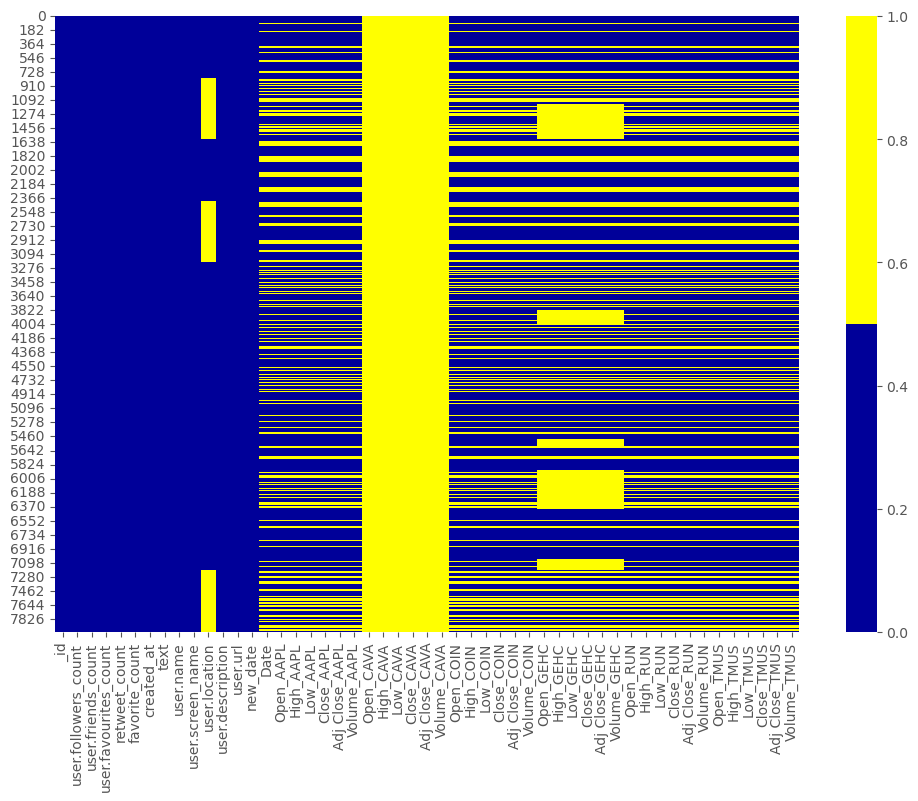

In [63]:
#graficamos nuevamente

# para tener una visión general de todos los atributos los graficamos todos
cols = merged_df.columns[:99] # first 99 columns
colours = ['#000099', '#ffff00'] # yellow is missing. blue is not missing.
sns.heatmap(merged_df[cols].isnull(), cmap=sns.color_palette(colours))

CAVA no tiene datos porque el último tweet descargado es más antiguo que las fechas de la base de datos actual de yahoo finance. CAVA solo tiene datos de junio en la base original de yahoo finance.

Haciendo uso de la API de twitter es posible descargar nuevamente los tweets hasta la fecha actual, pero en este caso no es posible porque hace poco restringieron la API de twitter y ahora no se pueden descargar los datos.

Por ende el análisis planeado se hará en los días que coinciden con los datos de descarga.

Los valores faltantes en las filas, siempre coinciden en cada atributo para los casos de los valores sacados desde yahoo finance, porque estos están relacionados a las fechas de yahoo finance y no a los de la base de twitter.

En el caso de GEHC, hay unos valores faltantes que no coinciden en todos los casos para las columnas correspondientes a la empresa. Esto se debe a que la base de datos de yahoo finance, no tiene datos anteriores a las fechas coincidentes. sin embargo, algunas fechas coinciden con la base de twitter y por ello no se ve todo como amarillo, en este caso, aún puede servir para el análisis del caso de estudio.

In [64]:
# VERIFICAMOS POR QUÉ CAVA NO TIENE DATOS
merged_df[['_id', 'created_at', 'new_date', 'Date', 'Open_CAVA', 'High_CAVA', 'Low_CAVA', 'Close_CAVA', 'Adj Close_CAVA', 'Volume_CAVA']].head(10)

,_id,created_at,new_date,Date,Open_CAVA,High_CAVA,Low_CAVA,Close_CAVA,Adj Close_CAVA,Volume_CAVA
0,645a7dc7f55dd5c3370166e6,Tue May 09 16:46:57 +0000 2023,2023-05-09,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN
1,645a7dc8f55dd5c3370166e7,Tue May 09 16:44:42 +0000 2023,2023-05-09,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN
2,645a7dc8f55dd5c3370166e8,Tue May 09 16:27:53 +0000 2023,2023-05-09,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN
3,645a7dc8f55dd5c3370166e9,Tue May 09 16:20:45 +0000 2023,2023-05-09,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN
4,645a7dc8f55dd5c3370166ea,Tue May 09 16:15:49 +0000 2023,2023-05-09,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN
5,645a7dc8f55dd5c3370166eb,Tue May 09 16:12:43 +0000 2023,2023-05-09,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN
6,645a7dc9f55dd5c3370166ec,Tue May 09 13:52:41 +0000 2023,2023-05-09,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN
7,645a7dc9f55dd5c3370166ed,Tue May 09 13:41:19 +0000 2023,2023-05-09,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN
8,645a7dc9f55dd5c3370166ee,Tue May 09 10:54:16 +0000 2023,2023-05-09,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN
9,645a7dc9f55dd5c3370166ef,Tue May 09 09:45:19 +0000 2023,2023-05-09,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in merged_df.columns:
    pct_missing = np.mean(merged_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


_id - 0%
user.followers_count - 0%
user.friends_count - 0%
user.favourites_count - 0%
retweet_count - 0%
favorite_count - 0%
created_at - 0%
text - 0%
user.name - 0%
user.screen_name - 0%
user.location - 30%
user.description - 0%
user.url - 0%
new_date - 0%
Date - 27%
Open_AAPL - 27%
High_AAPL - 27%
Low_AAPL - 27%
Close_AAPL - 27%
Adj Close_AAPL - 27%
Volume_AAPL - 27%
Open_CAVA - 100%
High_CAVA - 100%
Low_CAVA - 100%
Close_CAVA - 100%
Adj Close_CAVA - 100%
Volume_CAVA - 100%
Open_COIN - 27%
High_COIN - 27%
Low_COIN - 27%
Close_COIN - 27%
Adj Close_COIN - 27%
Volume_COIN - 27%
Open_GEHC - 40%
High_GEHC - 40%
Low_GEHC - 40%
Close_GEHC - 40%
Adj Close_GEHC - 40%
Volume_GEHC - 40%
Open_RUN - 27%
High_RUN - 27%
Low_RUN - 27%
Close_RUN - 27%
Adj Close_RUN - 27%
Volume_RUN - 27%
Open_TMUS - 27%
High_TMUS - 27%
Low_TMUS - 27%
Close_TMUS - 27%
Adj Close_TMUS - 27%
Volume_TMUS - 27%


**df_tweets_resumido**

Esto produce una lista abajo que muestra el porcentaje de valores faltantes para cada una de las características.
Específicamente, vemos que a la característica o atributo user.location es la única que tiene un un porcentaje de valores perdidos, el cual es del 30%.

Las de más características no tienen valores faltantes, por ello su valor es 0%


**Bases de datos de yahoo finance**
Los datos de CAVA no servirán para validar el modelo porque en la base de datos descargada desde twitter no hay datos para el mes de junio 2023, mes único en el cual si se registran datos desde yahoo finance. (SE DECIDE ELIMINAR LAS COLUMNAS REFERENTES A CAVA).





## Missing Data Histogram

Para aprender más sobre los patrones de valores perdidos entre las observaciones, podemos visualizarlos mediante un histograma.

In [66]:
merged_df

,_id,user.followers_count,user.friends_count,user.favourites_count,retweet_count,favorite_count,created_at,text,user.name,user.screen_name,...,Low_RUN,Close_RUN,Adj Close_RUN,Volume_RUN,Open_TMUS,High_TMUS,Low_TMUS,Close_TMUS,Adj Close_TMUS,Volume_TMUS
0,645a7dc7f55dd5c3370166e6,450887,72,40595,6,49,Tue May 09 16:46:57 +0000 2023,$34.4 trillion index price discovery. https://...,Sven Henrich,NorthmanTrader,...,16.330000,16.809999,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0
1,645a7dc8f55dd5c3370166e7,450887,72,40595,1,34,Tue May 09 16:44:42 +0000 2023,Yup.\n\nhttps://t.co/Viw0kAzURr,Sven Henrich,NorthmanTrader,...,16.330000,16.809999,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0
2,645a7dc8f55dd5c3370166e8,450887,72,40595,20,203,Tue May 09 16:27:53 +0000 2023,Same guy. Still predicting stuff &amp; still g...,Sven Henrich,NorthmanTrader,...,16.330000,16.809999,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0
3,645a7dc8f55dd5c3370166e9,450887,72,40595,40,205,Tue May 09 16:20:45 +0000 2023,The empire of debt has no choice but extend th...,Sven Henrich,NorthmanTrader,...,16.330000,16.809999,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0
4,645a7dc8f55dd5c3370166ea,450887,72,40595,7,125,Tue May 09 16:15:49 +0000 2023,Isn't that basically your job? Why give a spee...,Sven Henrich,NorthmanTrader,...,16.330000,16.809999,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,645a846ff55dd5c337018dca,388498,519,116874,0,2,Thu Dec 22 12:29:31 +0000 2022,@hereweago Not necessarily add size but rather...,Traderstewie,traderstewie,...,25.059999,25.770000,25.770000,5495900.0,140.570007,140.789993,137.729996,139.529999,139.529999,4692300.0
7996,645a8470f55dd5c337018dcb,388498,519,116874,0,0,Thu Dec 22 12:21:34 +0000 2022,@GelindoPastore Grazie,Traderstewie,traderstewie,...,25.059999,25.770000,25.770000,5495900.0,140.570007,140.789993,137.729996,139.529999,139.529999,4692300.0
7997,645a8470f55dd5c337018dcc,388498,519,116874,0,1,Thu Dec 22 07:05:53 +0000 2022,@CastleofFootba1 https://t.co/lMw7IPOZm7,Traderstewie,traderstewie,...,25.059999,25.770000,25.770000,5495900.0,140.570007,140.789993,137.729996,139.529999,139.529999,4692300.0
7998,645a8470f55dd5c337018dcd,388498,519,116874,156,742,Thu Dec 22 05:44:01 +0000 2022,I often find myself going back to re-read this...,Traderstewie,traderstewie,...,25.059999,25.770000,25.770000,5495900.0,140.570007,140.789993,137.729996,139.529999,139.529999,4692300.0


created missing indicator for: user.location
created missing indicator for: Date
created missing indicator for: Open_AAPL
created missing indicator for: High_AAPL
created missing indicator for: Low_AAPL
created missing indicator for: Close_AAPL
created missing indicator for: Adj Close_AAPL
created missing indicator for: Volume_AAPL
created missing indicator for: Open_CAVA
created missing indicator for: High_CAVA
created missing indicator for: Low_CAVA
created missing indicator for: Close_CAVA
created missing indicator for: Adj Close_CAVA
created missing indicator for: Volume_CAVA
created missing indicator for: Open_COIN
created missing indicator for: High_COIN
created missing indicator for: Low_COIN
created missing indicator for: Close_COIN
created missing indicator for: Adj Close_COIN
created missing indicator for: Volume_COIN
created missing indicator for: Open_GEHC
created missing indicator for: High_GEHC
created missing indicator for: Low_GEHC
created missing indicator for: Close_G

<Axes: xlabel='num_missing'>

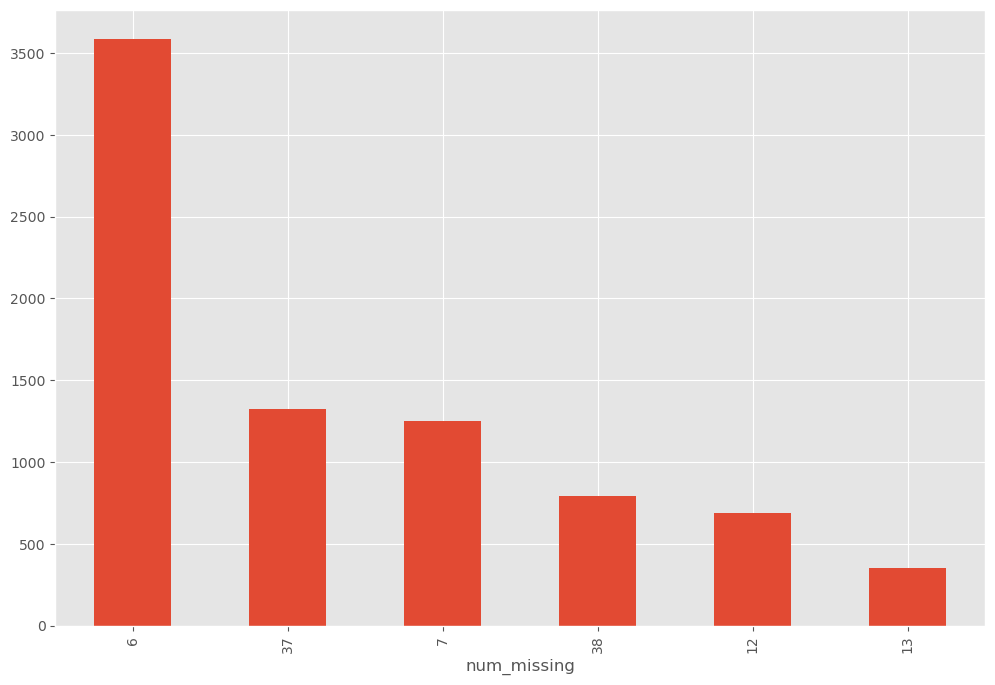

In [67]:
# first create missing indicator for features with missing data
for col in merged_df.columns:
    missing = merged_df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        merged_df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in merged_df.columns if 'ismissing' in col]
merged_df['num_missing'] = merged_df[ismissing_cols].sum(axis=1)

merged_df['num_missing'].value_counts().plot.bar(y='num_missing')


Este histograma ayuda a identificar las situaciones de valores faltantes de las 8.000 observaciones.

En el dataframe merged_df cabe resaltar que:

    hay más de 3.500 instancias con valores faltantes con 6 valores faltantes.
    
    Hay menos de 500 filas con 13 valores faltantes.
    
    Hay menos cerca de 1300 filas, con 37 valores faltantes.

In [68]:
print(merged_df.columns)
merged_df

Index(['_id', 'user.followers_count', 'user.friends_count',
       'user.favourites_count', 'retweet_count', 'favorite_count',
       'created_at', 'text', 'user.name', 'user.screen_name', 'user.location',
       'user.description', 'user.url', 'new_date', 'Date', 'Open_AAPL',
       'High_AAPL', 'Low_AAPL', 'Close_AAPL', 'Adj Close_AAPL', 'Volume_AAPL',
       'Open_CAVA', 'High_CAVA', 'Low_CAVA', 'Close_CAVA', 'Adj Close_CAVA',
       'Volume_CAVA', 'Open_COIN', 'High_COIN', 'Low_COIN', 'Close_COIN',
       'Adj Close_COIN', 'Volume_COIN', 'Open_GEHC', 'High_GEHC', 'Low_GEHC',
       'Close_GEHC', 'Adj Close_GEHC', 'Volume_GEHC', 'Open_RUN', 'High_RUN',
       'Low_RUN', 'Close_RUN', 'Adj Close_RUN', 'Volume_RUN', 'Open_TMUS',
       'High_TMUS', 'Low_TMUS', 'Close_TMUS', 'Adj Close_TMUS', 'Volume_TMUS',
       'user.location_ismissing', 'Date_ismissing', 'Open_AAPL_ismissing',
       'High_AAPL_ismissing', 'Low_AAPL_ismissing', 'Close_AAPL_ismissing',
       'Adj Close_AAPL_ismissin

,_id,user.followers_count,user.friends_count,user.favourites_count,retweet_count,favorite_count,created_at,text,user.name,user.screen_name,...,Close_RUN_ismissing,Adj Close_RUN_ismissing,Volume_RUN_ismissing,Open_TMUS_ismissing,High_TMUS_ismissing,Low_TMUS_ismissing,Close_TMUS_ismissing,Adj Close_TMUS_ismissing,Volume_TMUS_ismissing,num_missing
0,645a7dc7f55dd5c3370166e6,450887,72,40595,6,49,Tue May 09 16:46:57 +0000 2023,$34.4 trillion index price discovery. https://...,Sven Henrich,NorthmanTrader,...,False,False,False,False,False,False,False,False,False,6
1,645a7dc8f55dd5c3370166e7,450887,72,40595,1,34,Tue May 09 16:44:42 +0000 2023,Yup.\n\nhttps://t.co/Viw0kAzURr,Sven Henrich,NorthmanTrader,...,False,False,False,False,False,False,False,False,False,6
2,645a7dc8f55dd5c3370166e8,450887,72,40595,20,203,Tue May 09 16:27:53 +0000 2023,Same guy. Still predicting stuff &amp; still g...,Sven Henrich,NorthmanTrader,...,False,False,False,False,False,False,False,False,False,6
3,645a7dc8f55dd5c3370166e9,450887,72,40595,40,205,Tue May 09 16:20:45 +0000 2023,The empire of debt has no choice but extend th...,Sven Henrich,NorthmanTrader,...,False,False,False,False,False,False,False,False,False,6
4,645a7dc8f55dd5c3370166ea,450887,72,40595,7,125,Tue May 09 16:15:49 +0000 2023,Isn't that basically your job? Why give a spee...,Sven Henrich,NorthmanTrader,...,False,False,False,False,False,False,False,False,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,645a846ff55dd5c337018dca,388498,519,116874,0,2,Thu Dec 22 12:29:31 +0000 2022,@hereweago Not necessarily add size but rather...,Traderstewie,traderstewie,...,False,False,False,False,False,False,False,False,False,7
7996,645a8470f55dd5c337018dcb,388498,519,116874,0,0,Thu Dec 22 12:21:34 +0000 2022,@GelindoPastore Grazie,Traderstewie,traderstewie,...,False,False,False,False,False,False,False,False,False,7
7997,645a8470f55dd5c337018dcc,388498,519,116874,0,1,Thu Dec 22 07:05:53 +0000 2022,@CastleofFootba1 https://t.co/lMw7IPOZm7,Traderstewie,traderstewie,...,False,False,False,False,False,False,False,False,False,7
7998,645a8470f55dd5c337018dcd,388498,519,116874,156,742,Thu Dec 22 05:44:01 +0000 2022,I often find myself going back to re-read this...,Traderstewie,traderstewie,...,False,False,False,False,False,False,False,False,False,7


# ¿Qué hacer?
A continuación se describen los cuatro métodos más comunes para manejar los datos que faltan. Pero, si la situación es más complicada de lo habitual, tenemos que ser creativos para usar métodos más sofisticados como el modelado de datos perdidos.



##  Dejar o no dejar  la instancia

En estadística, este método se denomina técnica de supresión  ***( listwise deletion technique)***. En esta solución, eliminamos todas la observaciones siempre y cuando contenga un valor faltante.
Sólo si estamos seguros de que los datos que faltan **no son informativos**, lo hacemos. De lo contrario, debemos considerar otras soluciones.

A partir del histograma de datos faltantes, notamos que cerca del 10% de las filas tienen más de 36 características que faltan en total. Podríamos crear un nuevo conjunto de datos df_less_missing_rows eliminando las observaciones con más de 35 características que faltan.


In [69]:
# drop rows with a lot of missing values.
ind_missing = merged_df[merged_df['num_missing'] > 36].index
df_less_missing_rows = merged_df.drop(ind_missing, axis=0)
print(df_less_missing_rows.shape)

(5879, 90)


<Axes: >

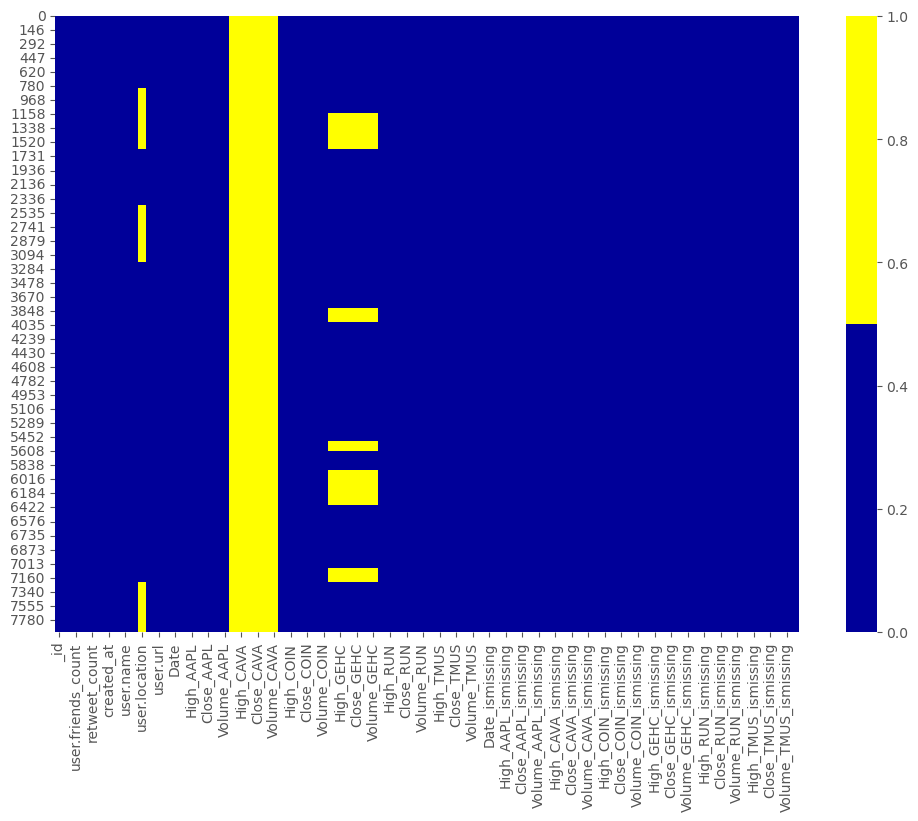

In [70]:
cols = df_less_missing_rows.columns[:99] # first 99 columns
colours = ['#000099', '#ffff00'] # yellow is missing. blue is not missing.
sns.heatmap(df_less_missing_rows[cols].isnull(), cmap=sns.color_palette(colours))

También podemos dejar los valores faltantes para las fechas de los tweets que no coincidan con las fechas de las fuentes de yahoofinance en la empresa con la mayor cantidad de datos (TMUS en este caso de estudio). Debe ser la que tenga mayor cantidad de datos, porque todas las bases de datos de las empresas, tienen las mismas fechas, lo único que varía, es la fecha en la que se empiezan a registrar los datos. Si la base con la fecha más antigua (TMUS) está en el mismo periodo que las bases de las otras empresas, entonces también incluye las fechas más actuales.

Hemos pasado en este caso de  8.000  a 5.879 instancias para el entrenamiento

---



## Dejar o no dejar la característica

Similar a la Solución 1, sólo lo hacemos cuando estamos seguros de que esta característica no proporciona información útil.


Por ejemplo, de la lista de % de datos faltantes, notamos que hospital_beds_raion tiene un alto porcentaje de valor faltante del 47%. Podemos eliminar toda la característica.

In [71]:
# user.location tiene muchos datos faltantes y no es importante. Los valores de CAVA no se incluirán en el análisis por falta de coincidencias con la base de twitter
# If we want to drop.
cols_to_drop = ['user.location','Open_CAVA','High_CAVA','Low_CAVA','Close_CAVA','Volume_CAVA','Adj Close_CAVA']
df_sin_userlocation_CAVA = df_less_missing_rows.drop(cols_to_drop, axis=1)
print(df_sin_userlocation_CAVA.shape)

(5879, 83)


(5879, 83)


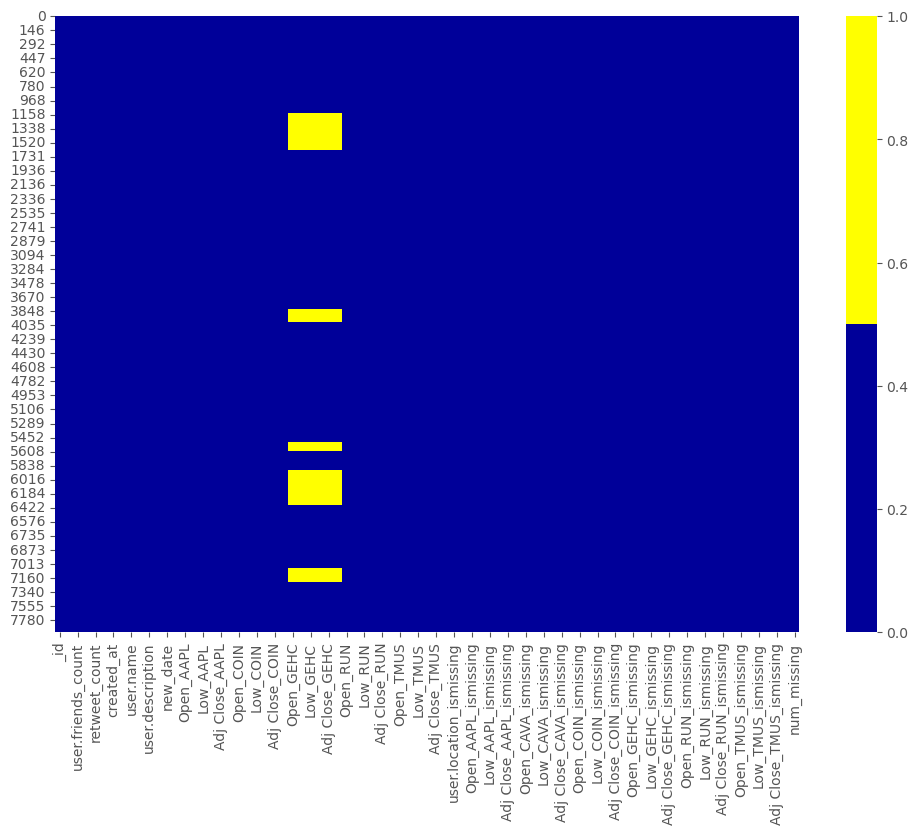

In [72]:
cols = df_sin_userlocation_CAVA.columns[:99] # first 99 columns
colours = ['#000099', '#ffff00'] # yellow is missing. blue is not missing.
sns.heatmap(df_sin_userlocation_CAVA[cols].isnull(), cmap=sns.color_palette(colours))
print(df_sin_userlocation_CAVA.shape)

Aqui comprobamos que tenemos las mismas instancias que se tenían después de eliminar los num_mising>36, porque lo único que hemos hecho es eliminar 7 variables de entrada (las de la empresa CAVA y la de los tweets user.location).

Los únicos datos que quedan con valores faltantes son los datos de la empresa GEHC. Estas filas no se pueden borrar , porque estaríamos eliminando datos importantes de las otras empresas.

Queda analizar que se hace con esos registros faltantes y qué se hace con los duplicados (¿se pueden eliminar o sustituir por otros valores?)

## Imputar a los desaparecidos


Cuando el rasgo es una variable numérica, podemos llevar a cabo algún computo con los datos que faltan.
Sustituimos los valores que faltan por el **valor medio o mediano** de los datos de la misma característica que no falta.
Cuando la característica es una variable categórica, podemos imputar los datos que faltan por el moda (el valor más frecuente).

En este caso de estudio, no es conveniente reemplazar valores perdidos por la mediana o media, porque alteraría enormemente la volatilidad del valor de las acciones en la bolsa y la tendencia podría alejarse demasiado de la realidad.

Hay valore faltantes en variables numéricas asociadas a los tweets.

Sin embargo, podemos aplicar la estrategia de imputación de modos para todos los rasgos categóricos a la vez.


In [73]:
# VER LOS DATOS NULL O NAN QUE SE TIENEN QUE RELLENAR CON LA MEDIA DE FORMA ORDENADA

#pd.set_option('display.max_rows', 10)
# Configurar la opción para mostrar todas las filas
#pd.set_option('display.max_rows', None)

#df_ordenado = df_sin_userlocation_CAVA[['Open_GEHC', 'Low_GEHC', 'Close_GEHC', 'Adj Close_GEHC', 'Volume_GEHC', 'new_date']].sort_values('new_date')
#df_ordenado

In [74]:
# replace missing values with the median.
med_open = df_sin_userlocation_CAVA['Open_GEHC'].median()
print(med_open)
df_sin_userlocation_CAVA['Open_GEHC'] = df_sin_userlocation_CAVA['Open_GEHC'].fillna(med_open)

med_low = df_sin_userlocation_CAVA['Low_GEHC'].median()
print(med_low)
df_sin_userlocation_CAVA['Low_GEHC'] = df_sin_userlocation_CAVA['Low_GEHC'].fillna(med_low)

med_high = df_sin_userlocation_CAVA['High_GEHC'].median()
print(med_high)
df_sin_userlocation_CAVA['High_GEHC'] = df_sin_userlocation_CAVA['High_GEHC'].fillna(med_high)

med_close = df_sin_userlocation_CAVA['Close_GEHC'].median()
print(med_close)
df_sin_userlocation_CAVA['Close_GEHC'] = df_sin_userlocation_CAVA['Close_GEHC'].fillna(med_close)

med_adj_close = df_sin_userlocation_CAVA['Adj Close_GEHC'].median()
print(med_adj_close)
df_sin_userlocation_CAVA['Adj Close_GEHC'] = df_sin_userlocation_CAVA['Adj Close_GEHC'].fillna(med_adj_close)

med_volume = df_sin_userlocation_CAVA['Volume_GEHC'].median()
print(med_volume)
df_sin_userlocation_CAVA['Volume_GEHC'] = df_sin_userlocation_CAVA['Volume_GEHC'].fillna(med_volume)

df_corregido_ordenado = df_sin_userlocation_CAVA[['Open_GEHC', 'Low_GEHC', 'High_GEHC','Close_GEHC', 'Adj Close_GEHC', 'Volume_GEHC', 'new_date']].sort_values('new_date')
df_corregido_ordenado

76.860001
76.264999
77.540001
76.900002
76.870926
1751400.0


,Open_GEHC,Low_GEHC,High_GEHC,Close_GEHC,Adj Close_GEHC,Volume_GEHC,new_date
6396,76.860001,76.264999,77.540001,76.900002,76.870926,1751400.0,2022-05-06
6393,76.860001,76.264999,77.540001,76.900002,76.870926,1751400.0,2022-05-06
6392,76.860001,76.264999,77.540001,76.900002,76.870926,1751400.0,2022-05-06
6399,76.860001,76.264999,77.540001,76.900002,76.870926,1751400.0,2022-05-06
6398,76.860001,76.264999,77.540001,76.900002,76.870926,1751400.0,2022-05-06
...,...,...,...,...,...,...,...
6401,78.550003,76.120003,78.790001,76.370003,76.341125,2499700.0,2023-05-09
6400,78.550003,76.120003,78.790001,76.370003,76.341125,2499700.0,2023-05-09
800,78.550003,76.120003,78.790001,76.370003,76.341125,2499700.0,2023-05-09
8,78.550003,76.120003,78.790001,76.370003,76.341125,2499700.0,2023-05-09


In [75]:
df_corregido_ordenado = df_sin_userlocation_CAVA.sort_values('new_date')
df_corregido_ordenado

,_id,user.followers_count,user.friends_count,user.favourites_count,retweet_count,favorite_count,created_at,text,user.name,user.screen_name,...,Close_RUN_ismissing,Adj Close_RUN_ismissing,Volume_RUN_ismissing,Open_TMUS_ismissing,High_TMUS_ismissing,Low_TMUS_ismissing,Close_TMUS_ismissing,Adj Close_TMUS_ismissing,Volume_TMUS_ismissing,num_missing
6396,645a831bf55dd5c337018609,234157,771,4211,10,54,Fri May 06 10:09:07 +0000 2022,This is an important part of the Archegos / GS...,MuddyWatersResearch,muddywatersre,...,False,False,False,False,False,False,False,False,False,12
6393,645a831bf55dd5c337018606,234157,771,4211,2,13,Fri May 06 17:48:43 +0000 2022,Freddy going hard in the paint stumping for Ro...,MuddyWatersResearch,muddywatersre,...,False,False,False,False,False,False,False,False,False,12
6392,645a831af55dd5c337018605,234157,771,4211,0,1,Fri May 06 19:38:02 +0000 2022,@Deathswap1 @zer0estv Absolutely - I remember ...,MuddyWatersResearch,muddywatersre,...,False,False,False,False,False,False,False,False,False,12
6399,645a831cf55dd5c33701860c,234157,771,4211,1,25,Fri May 06 09:32:40 +0000 2022,Re-upping this in celebration of Bill Hwang an...,MuddyWatersResearch,muddywatersre,...,False,False,False,False,False,False,False,False,False,12
6398,645a831bf55dd5c33701860b,234157,771,4211,7,104,Fri May 06 09:36:54 +0000 2022,"If there are “no limits”, why doesn’t Tom Crui...",MuddyWatersResearch,muddywatersre,...,False,False,False,False,False,False,False,False,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6401,645a831cf55dd5c33701860e,185628,4571,22550,1,0,Tue May 09 14:56:17 +0000 2023,RT @leomschwartz: Looking forward to this one—...,Tracy Alloway,tracyalloway,...,False,False,False,False,False,False,False,False,False,6
6400,645a831cf55dd5c33701860d,185628,4571,22550,6,0,Tue May 09 15:10:57 +0000 2023,RT @Quicktake: Childcare in America has become...,Tracy Alloway,tracyalloway,...,False,False,False,False,False,False,False,False,False,6
800,645a7e72f55dd5c337016acb,1259141,92,226,29,219,Tue May 09 13:37:59 +0000 2023,You should be able to roughly assess someone's...,Ray Dalio,RayDalio,...,False,False,False,False,False,False,False,False,False,7
8,645a7dc9f55dd5c3370166ee,450887,72,40595,0,1,Tue May 09 10:54:16 +0000 2023,@albertiwell Thanks,Sven Henrich,NorthmanTrader,...,False,False,False,False,False,False,False,False,False,6


In [76]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df_corregido_ordenado.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
non_numeric_cols

array(['_id', 'created_at', 'text', 'user.name', 'user.screen_name',
       'user.description', 'user.url', 'new_date', 'Date',
       'user.location_ismissing', 'Date_ismissing', 'Open_AAPL_ismissing',
       'High_AAPL_ismissing', 'Low_AAPL_ismissing',
       'Close_AAPL_ismissing', 'Adj Close_AAPL_ismissing',
       'Volume_AAPL_ismissing', 'Open_CAVA_ismissing',
       'High_CAVA_ismissing', 'Low_CAVA_ismissing',
       'Close_CAVA_ismissing', 'Adj Close_CAVA_ismissing',
       'Volume_CAVA_ismissing', 'Open_COIN_ismissing',
       'High_COIN_ismissing', 'Low_COIN_ismissing',
       'Close_COIN_ismissing', 'Adj Close_COIN_ismissing',
       'Volume_COIN_ismissing', 'Open_GEHC_ismissing',
       'High_GEHC_ismissing', 'Low_GEHC_ismissing',
       'Close_GEHC_ismissing', 'Adj Close_GEHC_ismissing',
       'Volume_GEHC_ismissing', 'Open_RUN_ismissing',
       'High_RUN_ismissing', 'Low_RUN_ismissing', 'Close_RUN_ismissing',
       'Adj Close_RUN_ismissing', 'Volume_RUN_ismissing',
   

In [77]:
# En este caso no se encontraron valores nulos, nan o faltantes categóricos.

# REEMPLAZAR CON LA MODA: Imputar los valores faltantes y crear variables indicadoras de valores faltantes para cada columna no numérica.
df_non_numeric = df_corregido_ordenado.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values   # .columns proporciona acceso a los nombres de las columnas en forma de objeto, y .values extrae estos nombres de columna como una matriz numpy para su posterior uso en el bucle for.

for col in non_numeric_cols:
    missing = df_corregido_ordenado[col].isnull()
    num_missing = np.sum(missing)  # Calcula el número total de valores faltantes en la columna actual sumando los valores True en la Serie missing.

    if num_missing > 0:
        print('imputing missing values for: {}'.format(col))
        df_corregido_ordenado['{}_ismissing'.format(col)] = missing

        top = df_corregido_ordenado[col].describe()['top'] # REEMPLAZA CON EL VALOR MÁS FRECUENTE (MODA).describe(): Aplica el método describe() a la columna seleccionada. Este método proporciona estadísticas descriptivas de la columna, como la cuenta, la media, la desviación estándar, el valor mínimo, el percentil 25, el percentil 50 (mediana), el percentil 75 y el valor máximo. ['top']: Accede al valor más frecuente (moda) de las estadísticas descriptivas generadas por describe(). El atributo 'top' se utiliza para obtener la moda de la columna.
        df_corregido_ordenado[col] = df_corregido_ordenado[col].fillna(top)

In [78]:
df_corregido_ordenado

,_id,user.followers_count,user.friends_count,user.favourites_count,retweet_count,favorite_count,created_at,text,user.name,user.screen_name,...,Close_RUN_ismissing,Adj Close_RUN_ismissing,Volume_RUN_ismissing,Open_TMUS_ismissing,High_TMUS_ismissing,Low_TMUS_ismissing,Close_TMUS_ismissing,Adj Close_TMUS_ismissing,Volume_TMUS_ismissing,num_missing
6396,645a831bf55dd5c337018609,234157,771,4211,10,54,Fri May 06 10:09:07 +0000 2022,This is an important part of the Archegos / GS...,MuddyWatersResearch,muddywatersre,...,False,False,False,False,False,False,False,False,False,12
6393,645a831bf55dd5c337018606,234157,771,4211,2,13,Fri May 06 17:48:43 +0000 2022,Freddy going hard in the paint stumping for Ro...,MuddyWatersResearch,muddywatersre,...,False,False,False,False,False,False,False,False,False,12
6392,645a831af55dd5c337018605,234157,771,4211,0,1,Fri May 06 19:38:02 +0000 2022,@Deathswap1 @zer0estv Absolutely - I remember ...,MuddyWatersResearch,muddywatersre,...,False,False,False,False,False,False,False,False,False,12
6399,645a831cf55dd5c33701860c,234157,771,4211,1,25,Fri May 06 09:32:40 +0000 2022,Re-upping this in celebration of Bill Hwang an...,MuddyWatersResearch,muddywatersre,...,False,False,False,False,False,False,False,False,False,12
6398,645a831bf55dd5c33701860b,234157,771,4211,7,104,Fri May 06 09:36:54 +0000 2022,"If there are “no limits”, why doesn’t Tom Crui...",MuddyWatersResearch,muddywatersre,...,False,False,False,False,False,False,False,False,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6401,645a831cf55dd5c33701860e,185628,4571,22550,1,0,Tue May 09 14:56:17 +0000 2023,RT @leomschwartz: Looking forward to this one—...,Tracy Alloway,tracyalloway,...,False,False,False,False,False,False,False,False,False,6
6400,645a831cf55dd5c33701860d,185628,4571,22550,6,0,Tue May 09 15:10:57 +0000 2023,RT @Quicktake: Childcare in America has become...,Tracy Alloway,tracyalloway,...,False,False,False,False,False,False,False,False,False,6
800,645a7e72f55dd5c337016acb,1259141,92,226,29,219,Tue May 09 13:37:59 +0000 2023,You should be able to roughly assess someone's...,Ray Dalio,RayDalio,...,False,False,False,False,False,False,False,False,False,7
8,645a7dc9f55dd5c3370166ee,450887,72,40595,0,1,Tue May 09 10:54:16 +0000 2023,@albertiwell Thanks,Sven Henrich,NorthmanTrader,...,False,False,False,False,False,False,False,False,False,6


## Reemplazar valores

Para las características categóricas, podemos añadir una nueva categoría con un valor como "FALTA_". Para los rasgos numéricos, podemos reemplazarlo con un valor particular como -999.

De esta manera, seguimos manteniendo los valores que faltan como información valiosa.

In [79]:
# En este caso, no hay valores null o nan para las columnas actuales, puesto que ya se realizó toda la limpieza necesaria.

# categorical
#df['sub_area'] = df['sub_area'].fillna('_MISSING_')


# numeric
#df['life_sq'] = df['life_sq'].fillna(-999)

# Outliers (Datos fuera de rango)

Los valores atípicos son datos que son distintivamente diferentes de otras observaciones. Pueden ser verdaderos valores atípicos o errores.

**¿Cómo averiguarlo?**

Dependiendo de si la característica es numérica o categórica, podemos utilizar diferentes técnicas para estudiar su distribución para detectar los valores atípicos.


## Histograma /Box Plot

Cuando la característica es numérica, podemos usar un histograma y un diagrama de caja para detectar los valores atípicos.
A continuación se muestra el histograma del rasgo *life_sq*.



<Axes: >

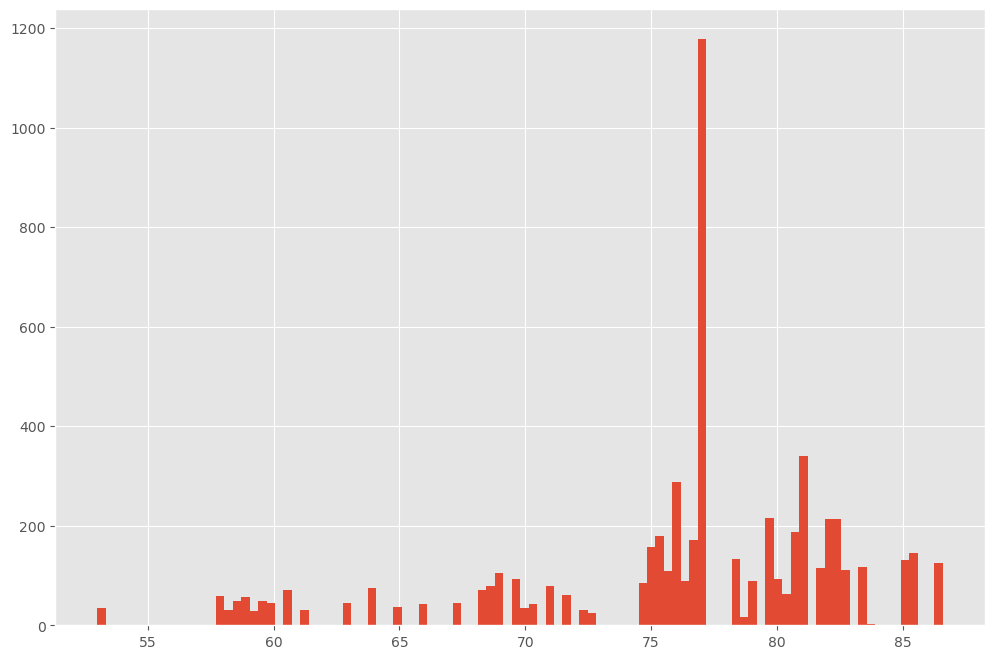

In [80]:
# histogram of life_sq.
df_corregido_ordenado['Open_GEHC'].hist(bins=100)

Los datos parecen muy sesgados con la posible existencia de valores atípicos. Estan centrados en un rango muy pequeño de valores

<Axes: >

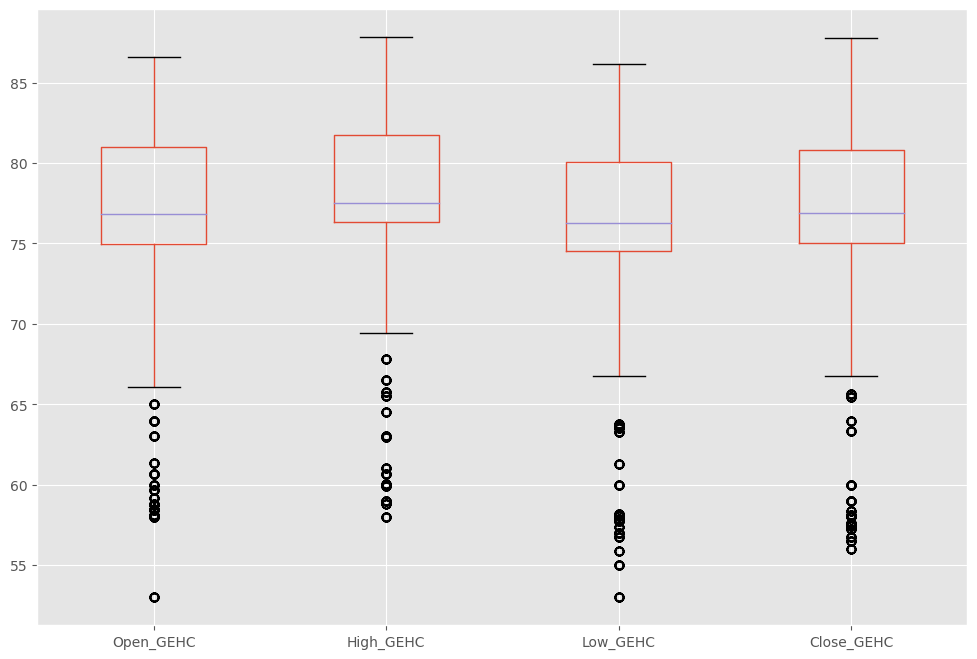

In [81]:
# box plot.
df_corregido_ordenado.boxplot(column=['Open_GEHC','High_GEHC','Low_GEHC','Close_GEHC'])

Este último grafico, nos muestra varios datos atípicos entre 50 y 65 .Mientras que en el otro gráfico lo podiamos intuir de forma visual, acá nos aseguramos sobre el punto exacto donde entra a ser un dato atípico.


## Diagrama de barras

Cuando la característica es categórica. Podemos usar un gráfico de barras para aprender sobre sus categorías y distribución.

Por ejemplo, la característica *ecology* tiene una distribución razonable. Pero si hay una categoría con un solo valor llamado "otro", entonces sería un atípico.

<Axes: xlabel='user.name'>

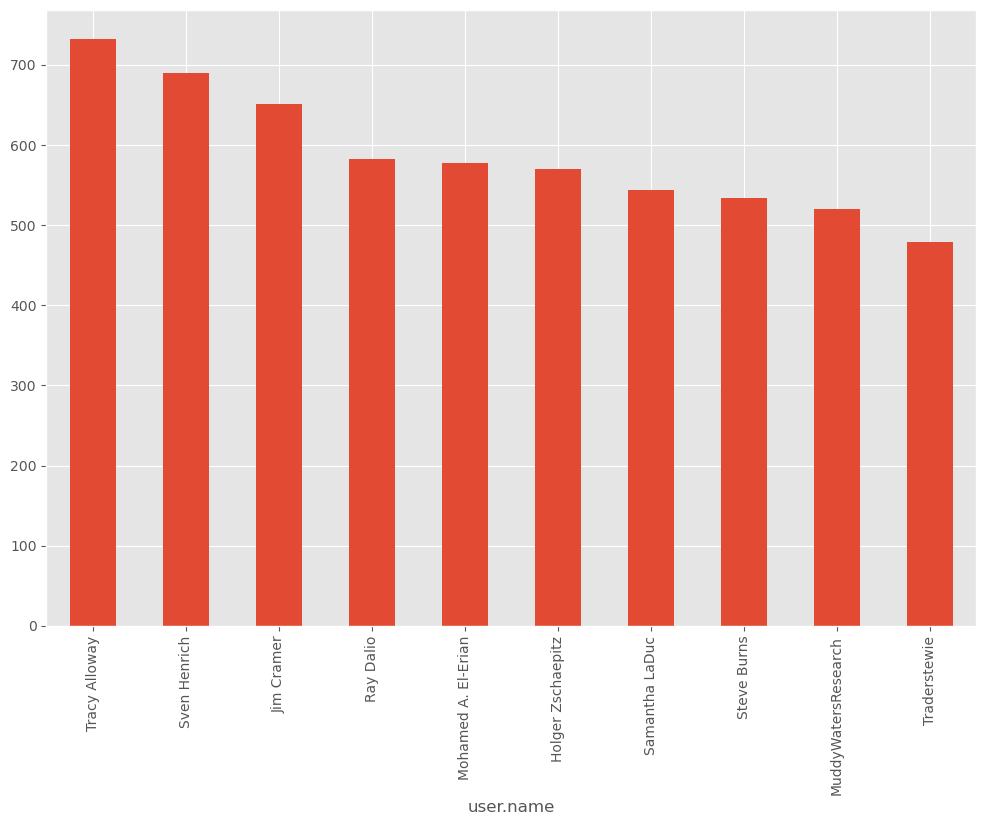

In [82]:
# Diagrama de barras, distribución de variable categórica
df_corregido_ordenado['user.name'].value_counts().plot.bar()

## Otras técnicas

Muchas otras técnicas también pueden detectar valores atípicos, como la gráfica de dispersión, la z-score y la agrupación.

Aunque los valores atípicos no son difíciles de detectar, tenemos que determinar las soluciones adecuadas para manejarlos.

Depende en gran medida del conjunto de datos y del **objetivo** del proyecto.
Los métodos para manejar los valores atípicos son algo similar a los datos que faltan.
- O bien los eliminamos
- o los ajustamos
- o los conservamos.

# Datos innecesarios

Después de todo el trabajo realizado para los datos que faltan y los valores atípicos, veamos los datos innecesarios, que son más sencillos.

Todos los datos que se introducen en el modelo deberían servir para el propósito del proyecto.
Los datos innecesarios son cuando los datos no añaden valor.

Hay  tres tipos principales de datos innecesarios debido a diferentes razones.

## Tipo innecesario 1: Desinformativo / Repetitivo

A veces una característica no es informativa porque tiene demasiadas filas que tienen el mismo valor.

**¿Cómo averiguarlo?**

Podemos crear una lista de características con un alto porcentaje del mismo valor.

Por ejemplo, especificamos a continuación para mostrar las características con más del 95% de filas que tienen el mismo valor.

In [83]:
# Las columnas missing, presentan un porcentaje del 100% de valores repetidos porque todas indican que no hay valores faltantes, esto se debe a que ya se limpió la base y ahora no falta ningún valor.

num_rows = len(df_corregido_ordenado.index)
low_information_cols = [] #

for col in df_corregido_ordenado.columns:
    cnts = df_corregido_ordenado[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Date_ismissing: 100.00000%
Date_ismissing
False    5879
Name: count, dtype: int64

Open_AAPL_ismissing: 100.00000%
Open_AAPL_ismissing
False    5879
Name: count, dtype: int64

High_AAPL_ismissing: 100.00000%
High_AAPL_ismissing
False    5879
Name: count, dtype: int64

Low_AAPL_ismissing: 100.00000%
Low_AAPL_ismissing
False    5879
Name: count, dtype: int64

Close_AAPL_ismissing: 100.00000%
Close_AAPL_ismissing
False    5879
Name: count, dtype: int64

Adj Close_AAPL_ismissing: 100.00000%
Adj Close_AAPL_ismissing
False    5879
Name: count, dtype: int64

Volume_AAPL_ismissing: 100.00000%
Volume_AAPL_ismissing
False    5879
Name: count, dtype: int64

Open_CAVA_ismissing: 100.00000%
Open_CAVA_ismissing
True    5879
Name: count, dtype: int64

High_CAVA_ismissing: 100.00000%
High_CAVA_ismissing
True    5879
Name: count, dtype: int64

Low_CAVA_ismissing: 100.00000%
Low_CAVA_ismissing
True    5879
Name: count, dtype: int64

Close_CAVA_ismissing: 100.00000%
Close_CAVA_ismissing
True    5879
Name

Podemos examinar estas variables una por una para ver si son informativas o no.

**¿Qué hacer?**

Necesitamos entender las razones detrás de la característica repetitiva. Cuando son genuinamente desinformativas, podemos descartarlas.

Las columnas missing, presentan un porcentaje del 100% de valores repetidos porque todas indican que no hay valores faltantes (esto hace parte del proceso de limpieza anterior), esto se debe a que ya se limpió la base y ahora no falta ningún valor. Son variables que informan acerca del registro anterior al proceso de limpieza, pero no aportan valor directamente al modelo, por ello, se pueden eliminar.



In [84]:
cols_to_drop = ['Date_ismissing','Open_AAPL_ismissing','High_AAPL_ismissing','Low_AAPL_ismissing','Close_AAPL_ismissing','Adj Close_AAPL_ismissing','Volume_AAPL_ismissing',
                'Open_CAVA_ismissing','High_CAVA_ismissing','Low_CAVA_ismissing','Close_CAVA_ismissing','Adj Close_CAVA_ismissing','Volume_CAVA_ismissing','Open_COIN_ismissing','High_COIN_ismissing',
                'Low_COIN_ismissing','Close_COIN_ismissing','Adj Close_COIN_ismissing','Volume_COIN_ismissing','Open_RUN_ismissing','High_RUN_ismissing','Low_RUN_ismissing','Close_RUN_ismissing',
                'Adj Close_RUN_ismissing','Volume_RUN_ismissing','Open_TMUS_ismissing','High_TMUS_ismissing','Low_TMUS_ismissing','Close_TMUS_ismissing','Adj Close_TMUS_ismissing','Volume_TMUS_ismissing']
df_corregido_ordenado = df_corregido_ordenado.drop(cols_to_drop, axis=1)
print(df_corregido_ordenado.shape)
df_corregido_ordenado



(5879, 52)


,_id,user.followers_count,user.friends_count,user.favourites_count,retweet_count,favorite_count,created_at,text,user.name,user.screen_name,...,Adj Close_TMUS,Volume_TMUS,user.location_ismissing,Open_GEHC_ismissing,High_GEHC_ismissing,Low_GEHC_ismissing,Close_GEHC_ismissing,Adj Close_GEHC_ismissing,Volume_GEHC_ismissing,num_missing
6396,645a831bf55dd5c337018609,234157,771,4211,10,54,Fri May 06 10:09:07 +0000 2022,This is an important part of the Archegos / GS...,MuddyWatersResearch,muddywatersre,...,126.800003,4701900.0,False,True,True,True,True,True,True,12
6393,645a831bf55dd5c337018606,234157,771,4211,2,13,Fri May 06 17:48:43 +0000 2022,Freddy going hard in the paint stumping for Ro...,MuddyWatersResearch,muddywatersre,...,126.800003,4701900.0,False,True,True,True,True,True,True,12
6392,645a831af55dd5c337018605,234157,771,4211,0,1,Fri May 06 19:38:02 +0000 2022,@Deathswap1 @zer0estv Absolutely - I remember ...,MuddyWatersResearch,muddywatersre,...,126.800003,4701900.0,False,True,True,True,True,True,True,12
6399,645a831cf55dd5c33701860c,234157,771,4211,1,25,Fri May 06 09:32:40 +0000 2022,Re-upping this in celebration of Bill Hwang an...,MuddyWatersResearch,muddywatersre,...,126.800003,4701900.0,False,True,True,True,True,True,True,12
6398,645a831bf55dd5c33701860b,234157,771,4211,7,104,Fri May 06 09:36:54 +0000 2022,"If there are “no limits”, why doesn’t Tom Crui...",MuddyWatersResearch,muddywatersre,...,126.800003,4701900.0,False,True,True,True,True,True,True,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6401,645a831cf55dd5c33701860e,185628,4571,22550,1,0,Tue May 09 14:56:17 +0000 2023,RT @leomschwartz: Looking forward to this one—...,Tracy Alloway,tracyalloway,...,142.029999,5038300.0,False,False,False,False,False,False,False,6
6400,645a831cf55dd5c33701860d,185628,4571,22550,6,0,Tue May 09 15:10:57 +0000 2023,RT @Quicktake: Childcare in America has become...,Tracy Alloway,tracyalloway,...,142.029999,5038300.0,False,False,False,False,False,False,False,6
800,645a7e72f55dd5c337016acb,1259141,92,226,29,219,Tue May 09 13:37:59 +0000 2023,You should be able to roughly assess someone's...,Ray Dalio,RayDalio,...,142.029999,5038300.0,True,False,False,False,False,False,False,7
8,645a7dc9f55dd5c3370166ee,450887,72,40595,0,1,Tue May 09 10:54:16 +0000 2023,@albertiwell Thanks,Sven Henrich,NorthmanTrader,...,142.029999,5038300.0,False,False,False,False,False,False,False,6


In [85]:
# Las columnas missing, presentan un porcentaje del 100% de valores repetidos porque todas indican que no hay valores faltantes, esto se debe a que ya se limpió la base y ahora no falta ningún valor.

num_rows = len(df_corregido_ordenado.index)
low_information_cols = [] #

for col in df_corregido_ordenado.columns:
    cnts = df_corregido_ordenado[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.80:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Open_GEHC_ismissing: 82.30992%
Open_GEHC_ismissing
False    4839
True     1040
Name: count, dtype: int64

High_GEHC_ismissing: 82.30992%
High_GEHC_ismissing
False    4839
True     1040
Name: count, dtype: int64

Low_GEHC_ismissing: 82.30992%
Low_GEHC_ismissing
False    4839
True     1040
Name: count, dtype: int64

Close_GEHC_ismissing: 82.30992%
Close_GEHC_ismissing
False    4839
True     1040
Name: count, dtype: int64

Adj Close_GEHC_ismissing: 82.30992%
Adj Close_GEHC_ismissing
False    4839
True     1040
Name: count, dtype: int64

Volume_GEHC_ismissing: 82.30992%
Volume_GEHC_ismissing
False    4839
True     1040
Name: count, dtype: int64



Al bajar el porcentaje de repetición máximo permitido a 80%, podemos visualizar algunas columnas que tampoco tienen importancia para el modelo, así que las eliminamos.

In [86]:
cols_to_drop = ['Open_GEHC_ismissing','High_GEHC_ismissing','Low_GEHC_ismissing','Close_GEHC_ismissing','Adj Close_GEHC_ismissing','Volume_GEHC_ismissing']
df_corregido_ordenado = df_corregido_ordenado.drop(cols_to_drop, axis=1)
print(df_corregido_ordenado.shape)
df_corregido_ordenado


(5879, 46)


,_id,user.followers_count,user.friends_count,user.favourites_count,retweet_count,favorite_count,created_at,text,user.name,user.screen_name,...,Adj Close_RUN,Volume_RUN,Open_TMUS,High_TMUS,Low_TMUS,Close_TMUS,Adj Close_TMUS,Volume_TMUS,user.location_ismissing,num_missing
6396,645a831bf55dd5c337018609,234157,771,4211,10,54,Fri May 06 10:09:07 +0000 2022,This is an important part of the Archegos / GS...,MuddyWatersResearch,muddywatersre,...,23.410000,9343700.0,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0,False,12
6393,645a831bf55dd5c337018606,234157,771,4211,2,13,Fri May 06 17:48:43 +0000 2022,Freddy going hard in the paint stumping for Ro...,MuddyWatersResearch,muddywatersre,...,23.410000,9343700.0,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0,False,12
6392,645a831af55dd5c337018605,234157,771,4211,0,1,Fri May 06 19:38:02 +0000 2022,@Deathswap1 @zer0estv Absolutely - I remember ...,MuddyWatersResearch,muddywatersre,...,23.410000,9343700.0,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0,False,12
6399,645a831cf55dd5c33701860c,234157,771,4211,1,25,Fri May 06 09:32:40 +0000 2022,Re-upping this in celebration of Bill Hwang an...,MuddyWatersResearch,muddywatersre,...,23.410000,9343700.0,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0,False,12
6398,645a831bf55dd5c33701860b,234157,771,4211,7,104,Fri May 06 09:36:54 +0000 2022,"If there are “no limits”, why doesn’t Tom Crui...",MuddyWatersResearch,muddywatersre,...,23.410000,9343700.0,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6401,645a831cf55dd5c33701860e,185628,4571,22550,1,0,Tue May 09 14:56:17 +0000 2023,RT @leomschwartz: Looking forward to this one—...,Tracy Alloway,tracyalloway,...,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0,False,6
6400,645a831cf55dd5c33701860d,185628,4571,22550,6,0,Tue May 09 15:10:57 +0000 2023,RT @Quicktake: Childcare in America has become...,Tracy Alloway,tracyalloway,...,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0,False,6
800,645a7e72f55dd5c337016acb,1259141,92,226,29,219,Tue May 09 13:37:59 +0000 2023,You should be able to roughly assess someone's...,Ray Dalio,RayDalio,...,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0,True,7
8,645a7dc9f55dd5c3370166ee,450887,72,40595,0,1,Tue May 09 10:54:16 +0000 2023,@albertiwell Thanks,Sven Henrich,NorthmanTrader,...,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0,False,6


In [87]:
cols_to_drop = ['user.location_ismissing','num_missing']
df_corregido_ordenado = df_corregido_ordenado.drop(cols_to_drop, axis=1)
print(df_corregido_ordenado.shape)
df_corregido_ordenado[['text']]

(5879, 44)


,text
6396,This is an important part of the Archegos / GS...
6393,Freddy going hard in the paint stumping for Ro...
6392,@Deathswap1 @zer0estv Absolutely - I remember ...
6399,Re-upping this in celebration of Bill Hwang an...
6398,"If there are “no limits”, why doesn’t Tom Crui..."
...,...
6401,RT @leomschwartz: Looking forward to this one—...
6400,RT @Quicktake: Childcare in America has become...
800,You should be able to roughly assess someone's...
8,@albertiwell Thanks


In [88]:
df_corregido_ordenado

,_id,user.followers_count,user.friends_count,user.favourites_count,retweet_count,favorite_count,created_at,text,user.name,user.screen_name,...,Low_RUN,Close_RUN,Adj Close_RUN,Volume_RUN,Open_TMUS,High_TMUS,Low_TMUS,Close_TMUS,Adj Close_TMUS,Volume_TMUS
6396,645a831bf55dd5c337018609,234157,771,4211,10,54,Fri May 06 10:09:07 +0000 2022,This is an important part of the Archegos / GS...,MuddyWatersResearch,muddywatersre,...,22.66,23.410000,23.410000,9343700.0,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0
6393,645a831bf55dd5c337018606,234157,771,4211,2,13,Fri May 06 17:48:43 +0000 2022,Freddy going hard in the paint stumping for Ro...,MuddyWatersResearch,muddywatersre,...,22.66,23.410000,23.410000,9343700.0,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0
6392,645a831af55dd5c337018605,234157,771,4211,0,1,Fri May 06 19:38:02 +0000 2022,@Deathswap1 @zer0estv Absolutely - I remember ...,MuddyWatersResearch,muddywatersre,...,22.66,23.410000,23.410000,9343700.0,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0
6399,645a831cf55dd5c33701860c,234157,771,4211,1,25,Fri May 06 09:32:40 +0000 2022,Re-upping this in celebration of Bill Hwang an...,MuddyWatersResearch,muddywatersre,...,22.66,23.410000,23.410000,9343700.0,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0
6398,645a831bf55dd5c33701860b,234157,771,4211,7,104,Fri May 06 09:36:54 +0000 2022,"If there are “no limits”, why doesn’t Tom Crui...",MuddyWatersResearch,muddywatersre,...,22.66,23.410000,23.410000,9343700.0,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6401,645a831cf55dd5c33701860e,185628,4571,22550,1,0,Tue May 09 14:56:17 +0000 2023,RT @leomschwartz: Looking forward to this one—...,Tracy Alloway,tracyalloway,...,16.33,16.809999,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0
6400,645a831cf55dd5c33701860d,185628,4571,22550,6,0,Tue May 09 15:10:57 +0000 2023,RT @Quicktake: Childcare in America has become...,Tracy Alloway,tracyalloway,...,16.33,16.809999,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0
800,645a7e72f55dd5c337016acb,1259141,92,226,29,219,Tue May 09 13:37:59 +0000 2023,You should be able to roughly assess someone's...,Ray Dalio,RayDalio,...,16.33,16.809999,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0
8,645a7dc9f55dd5c3370166ee,450887,72,40595,0,1,Tue May 09 10:54:16 +0000 2023,@albertiwell Thanks,Sven Henrich,NorthmanTrader,...,16.33,16.809999,16.809999,11091400.0,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0


## Tipo innecesario 2: Irrelevante

Una vez más, los datos deben proporcionar información valiosa para el proyecto. Si las características no están relacionadas con la cuestión que estamos tratando de resolver en el proyecto, son irrelevantes.

**¿Cómo averiguarlo?**

Necesitamos hojear las características para identificar las irrelevantes.
Por ejemplo, un rasgo que registra la *temperatura en Toronto* no proporciona ninguna información útil para predecir los precios de las *viviendas en Rusia*.

**¿Qué hacer?**

Cuando las características no sirven al objetivo del proyecto, podemos eliminarlas.

Las columnas que tienen datos provenientes de la base de datos de los tweets y diferentes al texto y la fecha, aportan información importante a la hora de validar los resultados del modelo con análisis de credibilidad, sin embargo, en este caso de estudio no se hará el análisis de credibilidad, pero si resulta de vital importancia para asegurar la confiabilidad de los datos en una aplicación real, por ello, se guardan estos datos en la base, para su posterior uso fuera del alcance del actual caso de estudio.

## Tipo innecesario 3: Duplicados

Los datos duplicados son cuando existen copias de la misma observación.
Hay dos tipos principales de datos duplicados.

### En base a las características

**¿Cómo averiguarlo?**

Este duplicado ocurre cuando todos los valores de las características dentro de las observaciones son los mismos.

Es fácil de encontrar.

Primero quitamos el identificador único del conjunto de datos. Luego creamos un conjunto de datos llamado *df_dedupped* eliminando los duplicados. Comparamos las formas de los dos conjuntos de datos (df y df_dedupped) para averiguar el número de filas duplicadas.

In [89]:
df_corregido_ordenado.columns

Index(['_id', 'user.followers_count', 'user.friends_count',
       'user.favourites_count', 'retweet_count', 'favorite_count',
       'created_at', 'text', 'user.name', 'user.screen_name',
       'user.description', 'user.url', 'new_date', 'Date', 'Open_AAPL',
       'High_AAPL', 'Low_AAPL', 'Close_AAPL', 'Adj Close_AAPL', 'Volume_AAPL',
       'Open_COIN', 'High_COIN', 'Low_COIN', 'Close_COIN', 'Adj Close_COIN',
       'Volume_COIN', 'Open_GEHC', 'High_GEHC', 'Low_GEHC', 'Close_GEHC',
       'Adj Close_GEHC', 'Volume_GEHC', 'Open_RUN', 'High_RUN', 'Low_RUN',
       'Close_RUN', 'Adj Close_RUN', 'Volume_RUN', 'Open_TMUS', 'High_TMUS',
       'Low_TMUS', 'Close_TMUS', 'Adj Close_TMUS', 'Volume_TMUS'],
      dtype='object')

In [90]:
# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df_corregido_ordenado.drop('_id', axis=1).drop_duplicates()

# there were duplicate rows
print(df_corregido_ordenado.shape)
print(df_dedupped.shape)

(5879, 44)
(5879, 43)


No se tienen instancias duplicadas

### En base a un subconjunto de características

**¿Cómo averiguarlo?**

A veces es mejor eliminar los datos duplicados basándose en un conjunto de identificadores únicos.

Por ejemplo, las posibilidades de que dos transacciones ocurran al mismo tiempo, con la misma superficie, el mismo precio y el mismo año de construcción son casi nulas.
Podemos establecer un grupo de características críticas como identificadores únicos para las transacciones. Incluimos la marca de tiempo, *full_sq, life_sq, piso, build_year, num_room, price_doc*.

Comprobamos si hay duplicados basados en ellos.

In [91]:
key = ['text']
df_sin_duplicados = df_corregido_ordenado
df_sin_duplicados.fillna(-999).groupby(key)['_id'].count().head(6000).sort_values(ascending=False)


text
RT @LaDucTrading: 🔥 Live Trading Room starting now with @SamanthaLaDuc 🔥\n\nJoin CLUB by LaDucTrading for immediate access \n➡️➡️ https://t.co…    6
Market Dashboard:\nhttps://t.co/vyHGc3zhoc                                                                                                         4
RT @LaDucTrading: 🔥 Live Stream with Riley and our discord crew starting now🔥\nAccess immediately with a 7 day free trial \n➡️ https://t.co/G…     4
RT @ftmoney: Comment: Investors should be wary of a repeat of last year’s ‘transitory inflation’ type of mistake, says Mohamed El-Erian @el…       3
Via @WallStreetSilv                                                                                                                                3
                                                                                                                                                  ..
Back today w a new episode of ZFG "Chinese Frauds &amp; Little D**k Energy" on @zer0estv - noon EDT. 

Se puede observar que hay datos de yahoo finance, que repiten todo el tiempo. En la mayoría de casos, se decidió usar el mismo valor correspondiente al día de ajuste de los precios de yahoo finance para todas las horas disponibles para ese día en la base de datos de twitter. Este tipo de duplicados se generaron de forma intencional, y se podría decir que en estos casos ya se imputaron los datos correspondientes, reemplazando un valor nulo por el precio correspondiente al día del tweet a cualquier hora.

Sin embargo existe la posibilidad de que se tengan dulplicados no correspondientes a la anterior situación, estos serían aquellos que tuviesen un texto igual (duplicado).

**¿Qué hacer?**

Podemos eliminar estos duplicados basándonos en las características principales. ( Si lo consideramos necesario)

In [92]:
# Eliminar duplicados basados en un subset de variables

key = ['text']
df_sin_duplicados2 = df_sin_duplicados.drop_duplicates(subset=key)

print(df_sin_duplicados.shape)
print(df_sin_duplicados2.shape)

(5879, 44)
(5838, 44)


Hemos eliminado 41 instancias duplicadas en función de este subconjunto de características

In [93]:
key = ['text']
df_sin_duplicados2.fillna(-999).groupby(key)['_id'].count().head(6000).sort_values(ascending=False)

text
"AI did this for me, AI did that for me"\n\nNever have more people taken more pride in not doing any actual work themselves.                    1
RT @BloombergTV: "The big allocators of the world always want to leave through the back door," Muddy Waters founder and CEO Carson Block te…    1
RT @Biohazard3737: The current bear market is basically the divine punishment for this.                                                         1
RT @BennettTomlin: The feds have CZ's phone, things are getting SPICY https://t.co/WRpKgDr5Oa                                                   1
RT @BearBullTraders: Capitalism vs socialism https://t.co/NY2N7mIqmS                                                                            1
                                                                                                                                               ..
Back to Square One: Now the cloud stocks have lost all their corona gains too! https://t.co/Z8bf1d0N7m                 

# Datos inconsistentes

También es crucial que el conjunto de datos siga estándares específicos para ajustarse a un modelo.
Necesitamos explorar los datos de diferentes maneras para encontrar los datos inconsistentes. La mayor parte del tiempo, depende de las observaciones y la experiencia. No hay un código establecido para ejecutarlo y arreglarlo todo.



## 1: Capitalization

El uso inconsistente de las mayúsculas y minúsculas en los valores categóricos es un error común. Podría causar problemas ya que los análisis en Python son sensibles a las mayúsculas y minúsculas.

**¿Cómo averiguarlo?**

Veamos la característica de sub_área.

In [94]:
df_sin_duplicados2.columns

Index(['_id', 'user.followers_count', 'user.friends_count',
       'user.favourites_count', 'retweet_count', 'favorite_count',
       'created_at', 'text', 'user.name', 'user.screen_name',
       'user.description', 'user.url', 'new_date', 'Date', 'Open_AAPL',
       'High_AAPL', 'Low_AAPL', 'Close_AAPL', 'Adj Close_AAPL', 'Volume_AAPL',
       'Open_COIN', 'High_COIN', 'Low_COIN', 'Close_COIN', 'Adj Close_COIN',
       'Volume_COIN', 'Open_GEHC', 'High_GEHC', 'Low_GEHC', 'Close_GEHC',
       'Adj Close_GEHC', 'Volume_GEHC', 'Open_RUN', 'High_RUN', 'Low_RUN',
       'Close_RUN', 'Adj Close_RUN', 'Volume_RUN', 'Open_TMUS', 'High_TMUS',
       'Low_TMUS', 'Close_TMUS', 'Adj Close_TMUS', 'Volume_TMUS'],
      dtype='object')

In [95]:

df_sin_duplicados2['user.name'].value_counts(dropna=False)

user.name
Tracy Alloway          732
Sven Henrich           687
Jim Cramer             651
Ray Dalio              581
Mohamed A. El-Erian    573
Holger Zschaepitz      570
Samantha LaDuc         534
MuddyWatersResearch    519
Steve Burns            512
Traderstewie           479
Name: count, dtype: int64

En este caso de estudio parece que todo está bien con respecto a la capitlaización de las palabras. A las demás columnas no se les debe cambiar la capitalización porque altera los datos originales de búsqueda en twitter, que permiten validar la veracidad de los datos.

In [96]:
# poner todo en minúscula
# df_sin_duplicados2['user.name_lower'] = df_sin_duplicados2['user.name'].str.lower()
# df_sin_duplicados2['user.name_lower'].value_counts(dropna=False)

## 2: Formato

Otra estandarización que debemos realizar es la de los formatos de datos. Un ejemplo es convertir la característica de cadena al formato DateTime.

**¿Cómo averiguarlo?**

El sello de tiempo de la característica está en formato datetime desde que se unieron las bases de datos (se puede observar esto en la columna creada 'new_date'.

In [97]:
df_sin_duplicados2.dtypes

df_sin_duplicados2[['created_at','new_date','Date']]

,created_at,new_date,Date
6396,Fri May 06 10:09:07 +0000 2022,2022-05-06,2022-05-06
6393,Fri May 06 17:48:43 +0000 2022,2022-05-06,2022-05-06
6392,Fri May 06 19:38:02 +0000 2022,2022-05-06,2022-05-06
6399,Fri May 06 09:32:40 +0000 2022,2022-05-06,2022-05-06
6398,Fri May 06 09:36:54 +0000 2022,2022-05-06,2022-05-06
...,...,...,...
6401,Tue May 09 14:56:17 +0000 2023,2023-05-09,2023-05-09
6400,Tue May 09 15:10:57 +0000 2023,2023-05-09,2023-05-09
800,Tue May 09 13:37:59 +0000 2023,2023-05-09,2023-05-09
8,Tue May 09 10:54:16 +0000 2023,2023-05-09,2023-05-09


**¿Qué hacer?**

Podemos convertirlo y extraer los valores de fecha u hora usando el código que se muestra a continuación. Después de esto, es más fácil analizar el grupo de volumen de transacciones por año o mes.

In [98]:
# df_sin_duplicados2['new_date_formateado'] = pd.to_datetime(df_sin_duplicados2['new_date'], format='%Y-%m-%d') esta linea no es necesaria porque la columna ya etá en formato datetime
df_sin_duplicados2['year'] = df_sin_duplicados2['new_date'].dt.year
df_sin_duplicados2['month'] = df_sin_duplicados2['new_date'].dt.month
df_sin_duplicados2['weekday'] = df_sin_duplicados2['new_date'].dt.weekday  # La función dt.weekday devuelve los días de la semana como números enteros, donde el lunes se representa como 0 y el domingo como 6.
df_sin_duplicados2['day'] = df_sin_duplicados2['new_date'].dt.day

print(df_sin_duplicados2['year'].value_counts(dropna=False))
print()
print(df_sin_duplicados2['month'].value_counts(dropna=False))
print()
print(df_sin_duplicados2['weekday'].value_counts(dropna=False))
print()
print(df_sin_duplicados2['day'].value_counts(dropna=False))

year
2023    4521
2022    1317
Name: count, dtype: int64

month
4     1589
3     1276
1      598
5      577
2      522
12     467
11     274
10     136
6      116
8      108
7      100
9       75
Name: count, dtype: int64

weekday
4    1610
3    1545
0    1404
1    1236
2      43
Name: count, dtype: int64

day
13    357
10    331
14    306
20    291
17    290
24    283
27    277
6     252
21    237
5     234
28    231
3     230
4     211
2     194
9     193
16    174
23    173
1     164
11    159
8     149
30    145
18    140
31    133
25    132
7     115
12    113
19     91
26     63
15     62
22     62
29     46
Name: count, dtype: int64


In [99]:
# Configurar la opción para mostrar todas las filas
pd.set_option('display.max_rows', 10)
df_sin_duplicados2[['created_at','new_date','year','month','day','weekday']]

,created_at,new_date,year,month,day,weekday
6396,Fri May 06 10:09:07 +0000 2022,2022-05-06,2022,5,6,4
6393,Fri May 06 17:48:43 +0000 2022,2022-05-06,2022,5,6,4
6392,Fri May 06 19:38:02 +0000 2022,2022-05-06,2022,5,6,4
6399,Fri May 06 09:32:40 +0000 2022,2022-05-06,2022,5,6,4
6398,Fri May 06 09:36:54 +0000 2022,2022-05-06,2022,5,6,4
...,...,...,...,...,...,...
6401,Tue May 09 14:56:17 +0000 2023,2023-05-09,2023,5,9,1
6400,Tue May 09 15:10:57 +0000 2023,2023-05-09,2023,5,9,1
800,Tue May 09 13:37:59 +0000 2023,2023-05-09,2023,5,9,1
8,Tue May 09 10:54:16 +0000 2023,2023-05-09,2023,5,9,1


## 3: Valores categóricos

Una característica categórica tiene un número limitado de valores. A veces puede haber otros valores debido a razones como los errores tipográficos.


**¿Cómo averiguarlo?**


Necesitamos observar la característica para descubrir esta inconsistencia.

Una forma sencilla de identificarlos es la lógica difusa (o editar la distancia). Mide cuántas letras (distancia) necesitamos para cambiar la ortografía de un valor para que coincida con otro valor.
Se podrá ver que los que pueden ser errores tipográficos tienen una distancia menor con la palabra correcta. Ya que sólo se diferencian por un par de letras.

En esta base de datos no existen variables categóricas que puedan tener dichos errores tipográficos. Es probable encontrar errores tipográficos en la columna texto, pero allí no es necesario aplicar este tipo de estandarización, ya que dicha acción en la columna texto no genera ningún valor agregado al modelo.


In [100]:
# from nltk.metrics import edit_distance

# df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})


# df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))  #La función lambda en Python se utiliza para crear funciones anónimas y breves que no requieren una definición formal con la palabra clave def. Estas funciones se definen utilizando la sintaxis lambda argumentos: expresión, donde argumentos son los parámetros de la función y expresión es el resultado que devuelve la función. En el contexto de tu ejemplo, la función lambda se utiliza junto con el método map() para aplicar la función edit_distance() a cada valor de la columna 'city' del DataFrame df_city_ex. La función edit_distance() se utiliza para calcular la distancia de edición entre dos cadenas de texto.
# df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
# df_city_ex

In [101]:
# Podemos establecer criterios para convertir estos errores tipográficos a los valores correctos. Por ejemplo, el siguiente código establece que todos los valores dentro de una distancia de 2 letras de "toronto" sean "toronto".
#msk = df_city_ex['city_distance_toronto'] <= 2
#df_city_ex.loc[msk, 'city'] = 'toronto'

#msk = df_city_ex['city_distance_vancouver'] <= 2
#df_city_ex.loc[msk, 'city'] = 'vancouver'

#df_city_ex

## 4: Direcciones

No hay direcciones en la base de datos del caso de estudio, y tampoco hay frases o palabras que requieran estandarización de este tipo, por tento se finaliza el proceso de limpieza.

In [102]:
# no address column in the housing dataset. So create one to show the code.
# df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
# df_add_ex

In [103]:
#Ejecutamos el siguiente código para poner las letras en minúsculas, eliminar los espacios en blanco, eliminar los puntos y estandarizar las palabras.

#df_add_ex['address_std'] = df_add_ex['address'].str.lower()
#df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespace.
#df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '') # remove period.
#df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st') # replace street with st.
#df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt') # replace apartment with apt.
#df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave') # replace apartment with apt.

#df_add_ex

# COMPARACIÓN DE RESULTADOS CON BASE ORIGINAL

## Base de datos inicial de twitter

<Axes: >

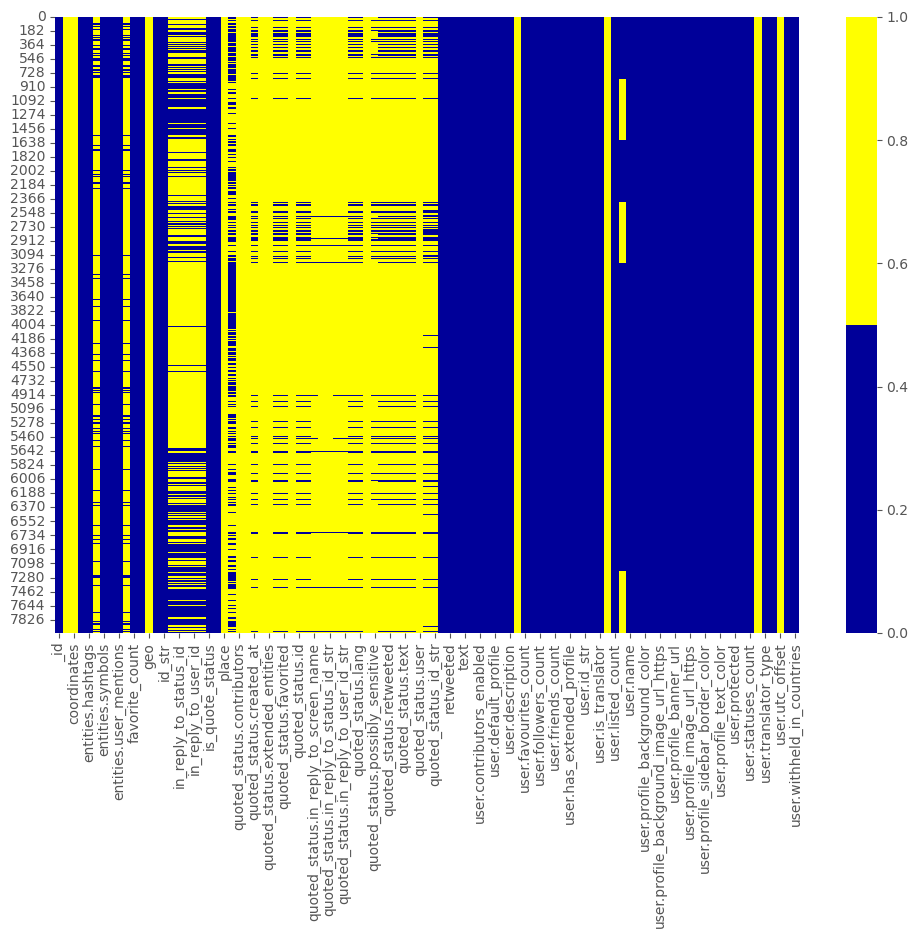

In [104]:
cols = df_tweets.columns[:99] # Primeras 99 columnas
colours = ['#000099', '#ffff00'] # Amarillo es faltante y azul es no faltante.
sns.heatmap(df_tweets[cols].isnull(), cmap=sns.color_palette(colours))

## Base de datos final o preprocesada, unida con 6 bases de datos de yahoo finance.

<Axes: >

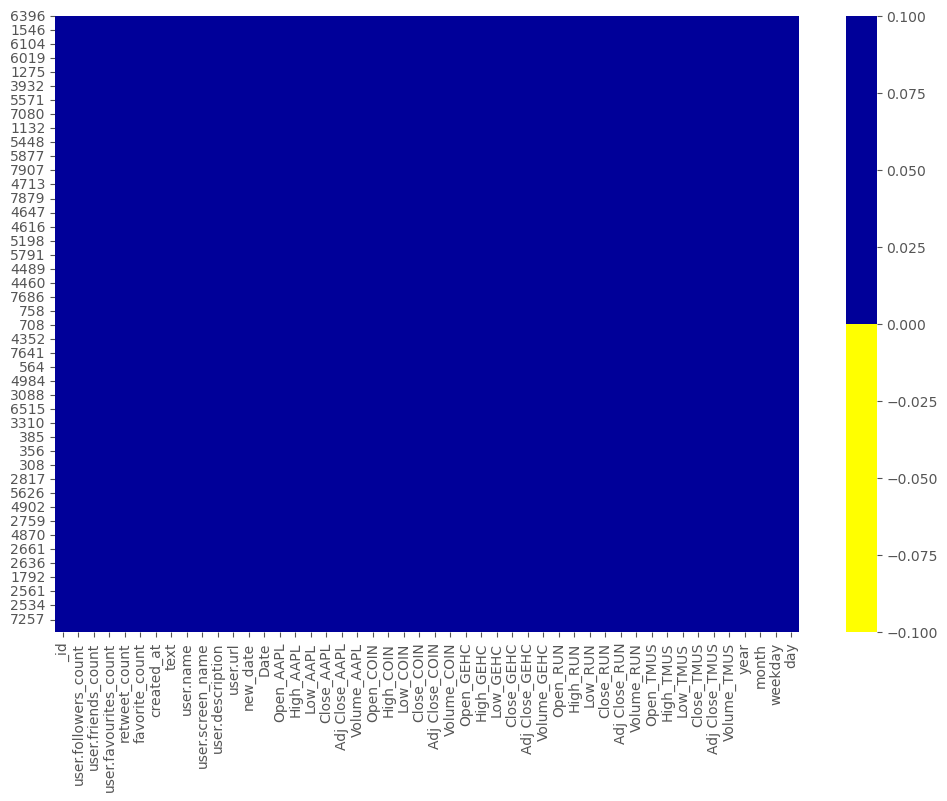

In [105]:

cols = df_sin_duplicados2.columns[:99] # primeras 99 columnas
colours = ['#ffff00','#000099'] # Amarillo es faltante y azul es no faltante.
sns.heatmap(df_sin_duplicados2[cols].isnull(), cmap=sns.color_palette(colours))

Analizando los resutados obtenidos, se concluye que en el proceso de preprocesamiento de datos y calidad de los datos se logró:



*   Leer los ficheros de diferentes fuentes de datos (6 empresas diferentes y la base de datos de twitter) en un entorno python para tratar los datos.
*   Usar la API de yahoo finance para descargar los datos financieros.
*   Unieron 7 bases de datos con 10.574 registros. Dichas bases fueron obtenidas de diferentes fuentes de datos (un total de 141 atributos diferentes).
*   Se identificaron todas las variables, atributos o características númericas y no numéricas.
*   Se usaron mapas de calor, análisis de porcentaje de valores faltantes y análisis de histograma para identificar aquellas características y filas con valores faltantes.
*   Se imputaron los valores Null o NAN
*   se imputaron los valores atípicos o outliers.
*   Se eliminaron los datos innecesarios o irrelevantes.
*   Se aseguró la consistencia de los datos.






In [106]:
df_sin_duplicados2

,_id,user.followers_count,user.friends_count,user.favourites_count,retweet_count,favorite_count,created_at,text,user.name,user.screen_name,...,Open_TMUS,High_TMUS,Low_TMUS,Close_TMUS,Adj Close_TMUS,Volume_TMUS,year,month,weekday,day
6396,645a831bf55dd5c337018609,234157,771,4211,10,54,Fri May 06 10:09:07 +0000 2022,This is an important part of the Archegos / GS...,MuddyWatersResearch,muddywatersre,...,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0,2022,5,4,6
6393,645a831bf55dd5c337018606,234157,771,4211,2,13,Fri May 06 17:48:43 +0000 2022,Freddy going hard in the paint stumping for Ro...,MuddyWatersResearch,muddywatersre,...,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0,2022,5,4,6
6392,645a831af55dd5c337018605,234157,771,4211,0,1,Fri May 06 19:38:02 +0000 2022,@Deathswap1 @zer0estv Absolutely - I remember ...,MuddyWatersResearch,muddywatersre,...,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0,2022,5,4,6
6399,645a831cf55dd5c33701860c,234157,771,4211,1,25,Fri May 06 09:32:40 +0000 2022,Re-upping this in celebration of Bill Hwang an...,MuddyWatersResearch,muddywatersre,...,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0,2022,5,4,6
6398,645a831bf55dd5c33701860b,234157,771,4211,7,104,Fri May 06 09:36:54 +0000 2022,"If there are “no limits”, why doesn’t Tom Crui...",MuddyWatersResearch,muddywatersre,...,128.259995,129.490005,125.089996,126.800003,126.800003,4701900.0,2022,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6401,645a831cf55dd5c33701860e,185628,4571,22550,1,0,Tue May 09 14:56:17 +0000 2023,RT @leomschwartz: Looking forward to this one—...,Tracy Alloway,tracyalloway,...,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0,2023,5,1,9
6400,645a831cf55dd5c33701860d,185628,4571,22550,6,0,Tue May 09 15:10:57 +0000 2023,RT @Quicktake: Childcare in America has become...,Tracy Alloway,tracyalloway,...,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0,2023,5,1,9
800,645a7e72f55dd5c337016acb,1259141,92,226,29,219,Tue May 09 13:37:59 +0000 2023,You should be able to roughly assess someone's...,Ray Dalio,RayDalio,...,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0,2023,5,1,9
8,645a7dc9f55dd5c3370166ee,450887,72,40595,0,1,Tue May 09 10:54:16 +0000 2023,@albertiwell Thanks,Sven Henrich,NorthmanTrader,...,143.809998,144.080002,141.750000,142.029999,142.029999,5038300.0,2023,5,1,9


In [109]:
# Guardar el DataFrame en un archivo CSV
df_sin_duplicados2.to_csv('df_sin_duplicados2.csv', index=False)  # Si no deseas incluir el índice en el archivo CSV